In [15]:
from keras.models import load_model
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2

[INFO] Loading model...


[INFO] Reading video: C:\Users\Vyshnavi Malle\Desktop\final_project\archive\Dataset\Violence\V_30.mp4


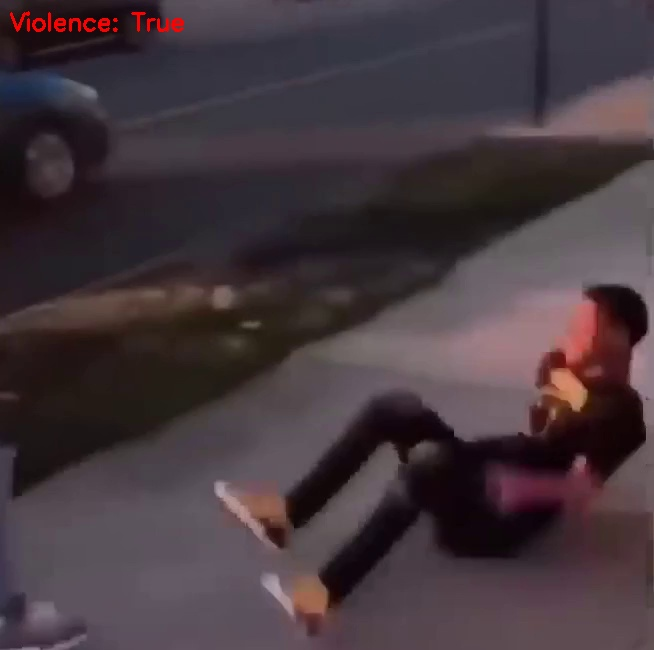

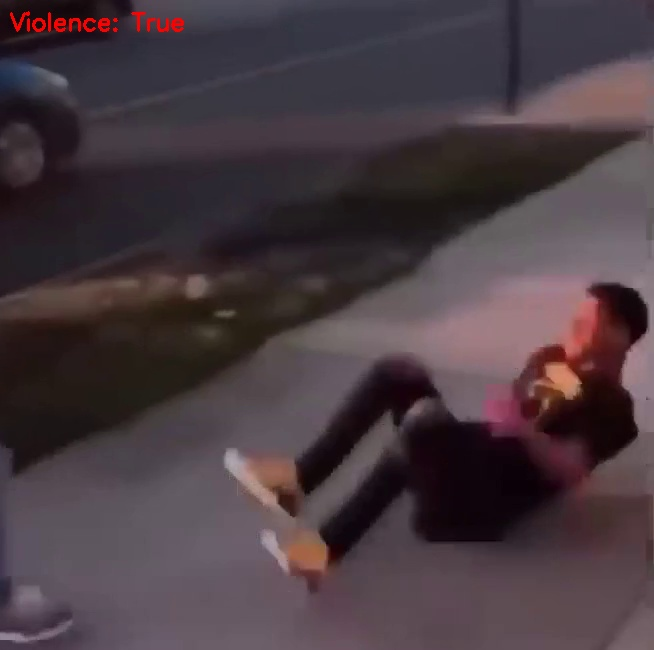

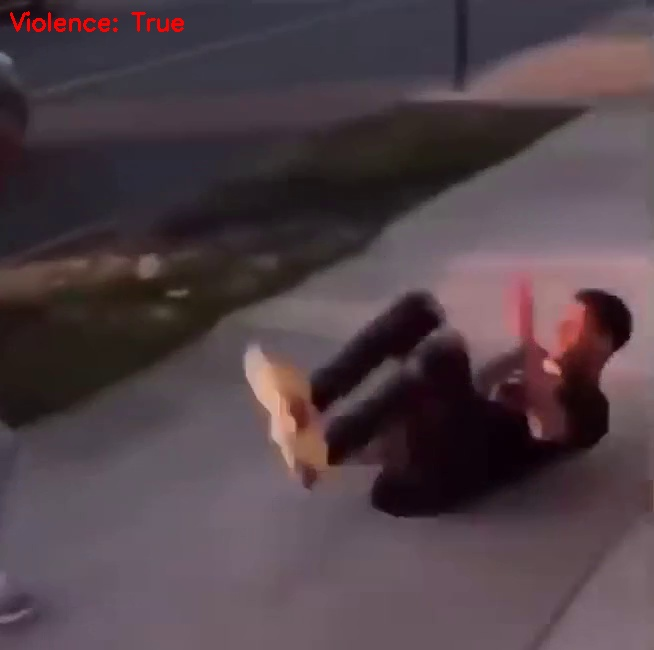

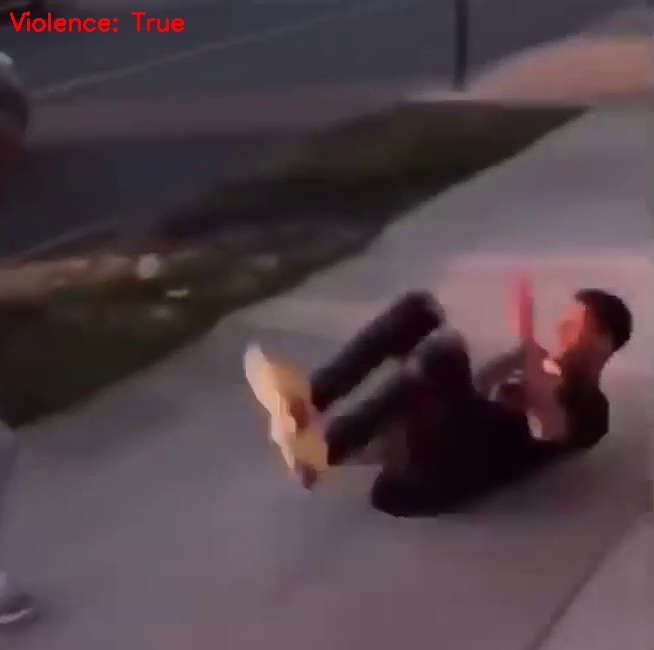

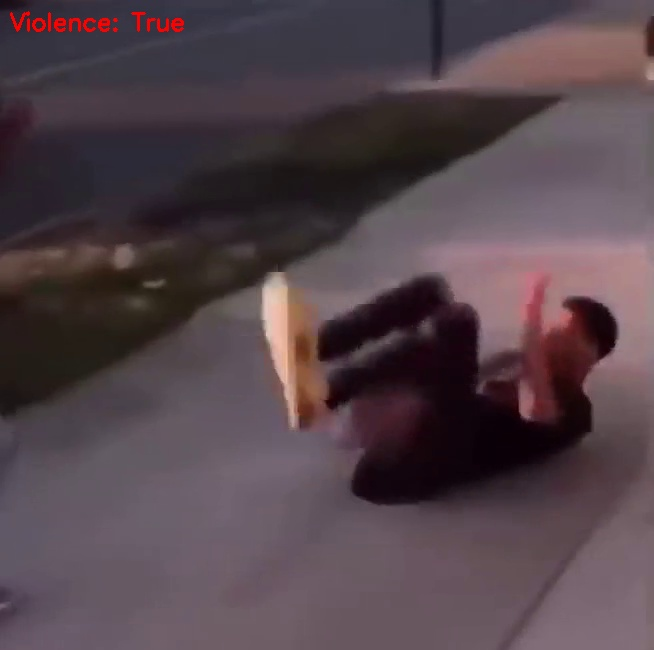

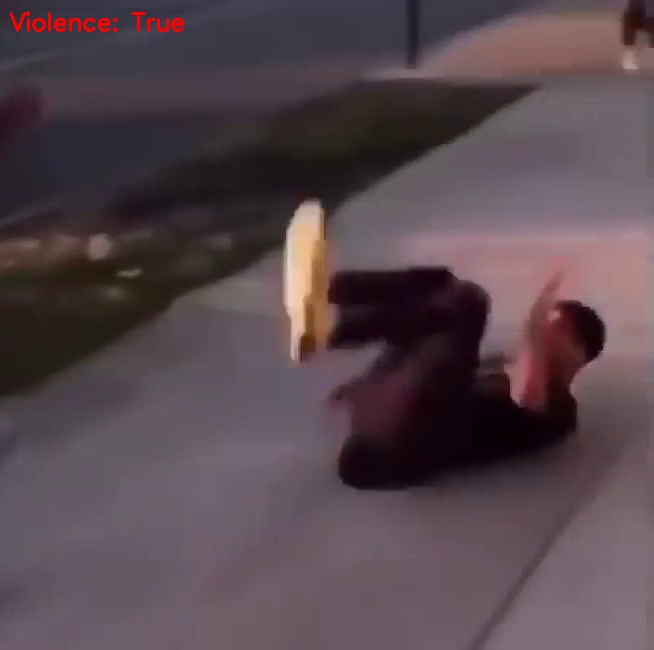

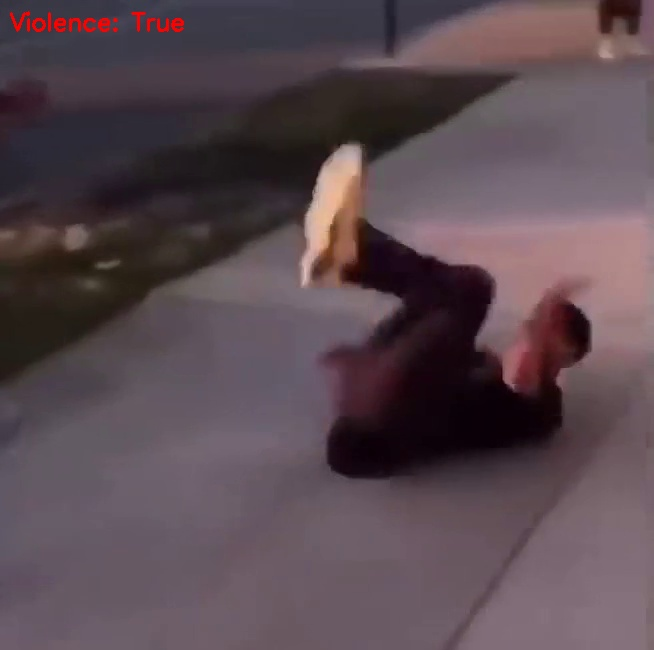

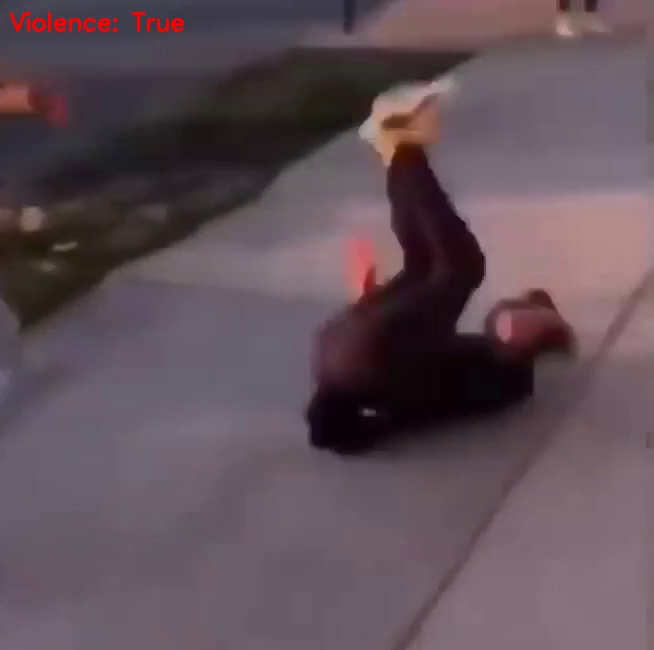

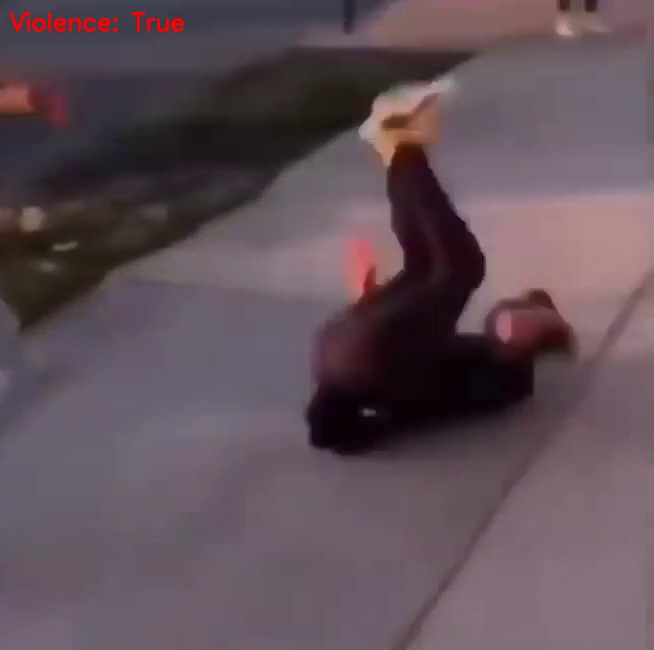

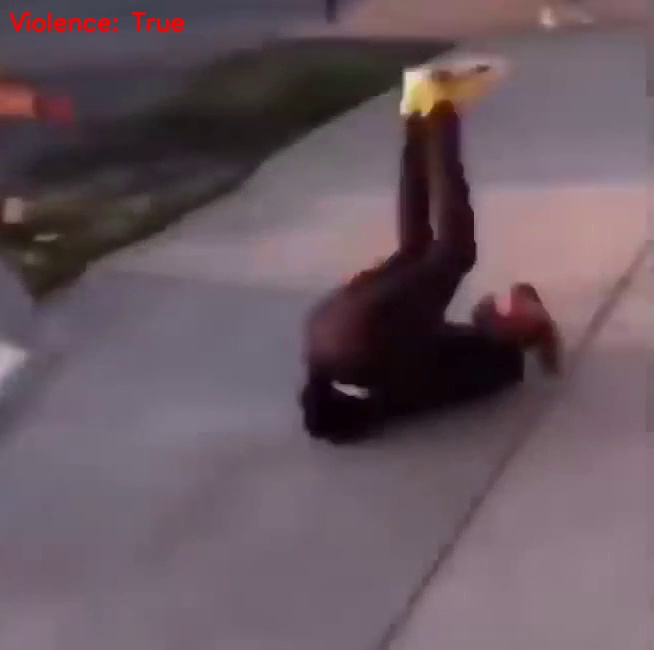

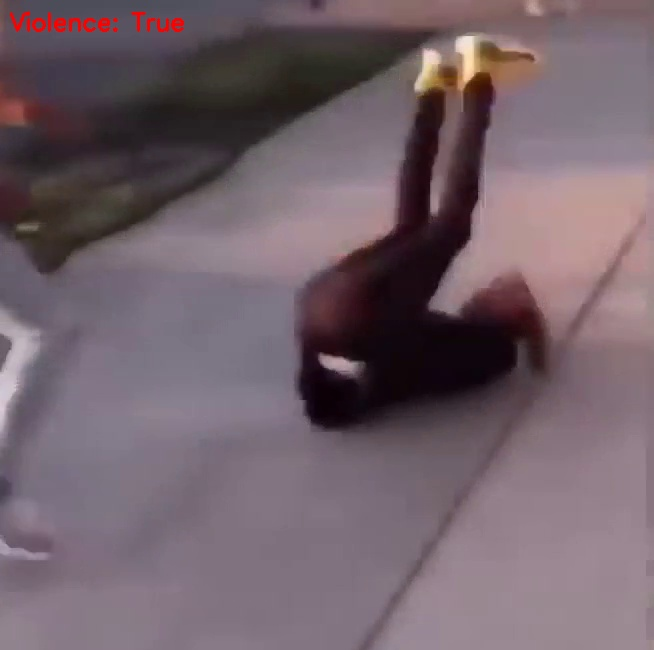

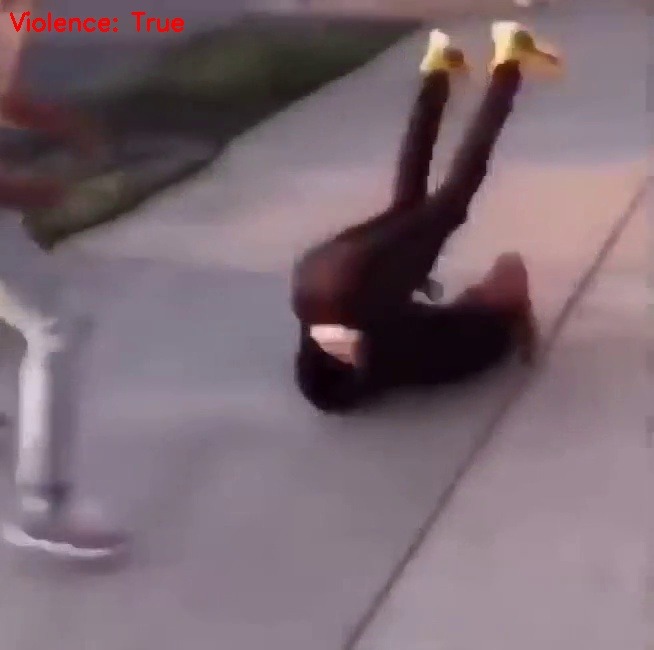

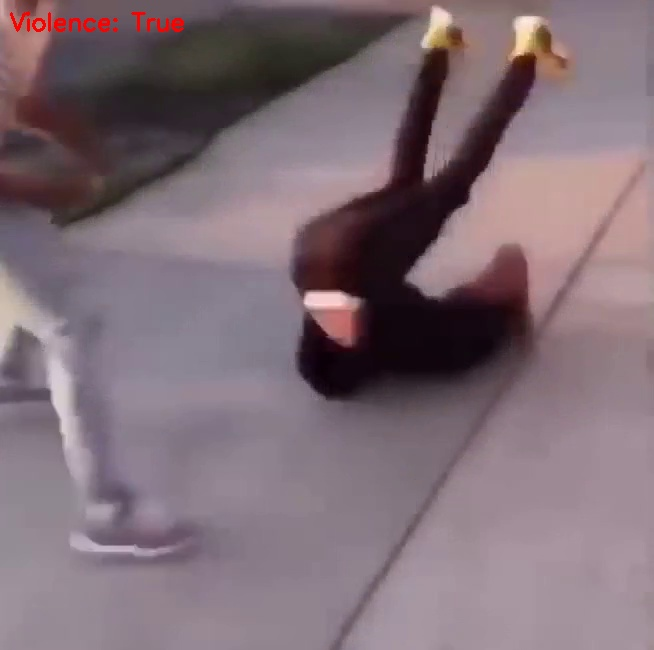

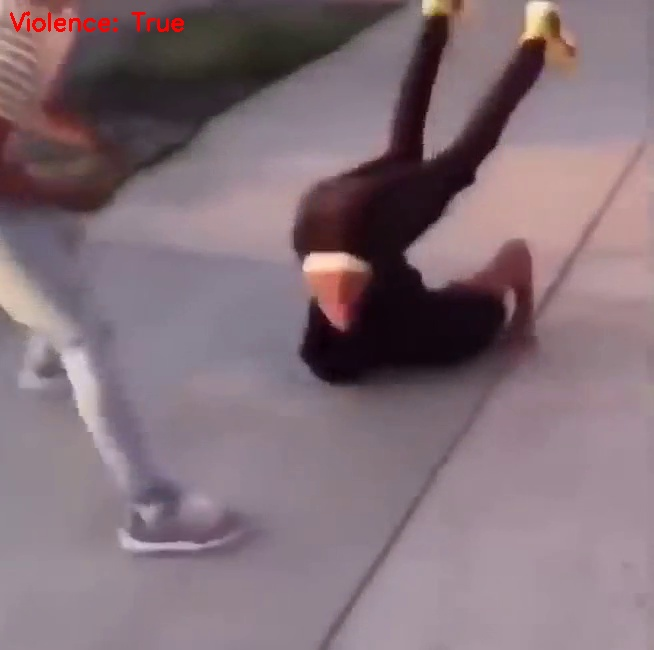

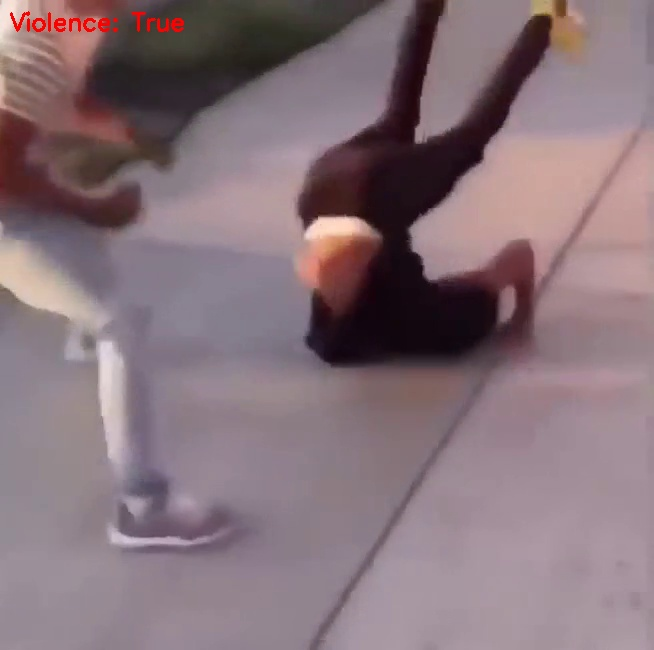

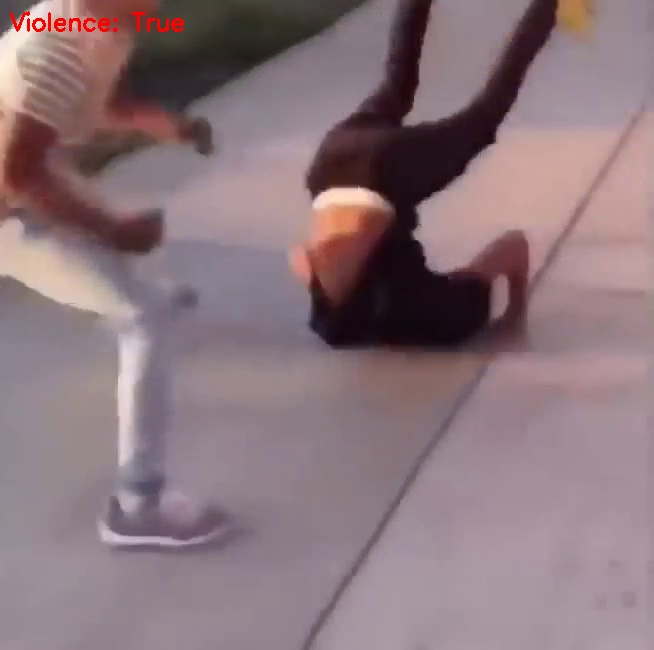

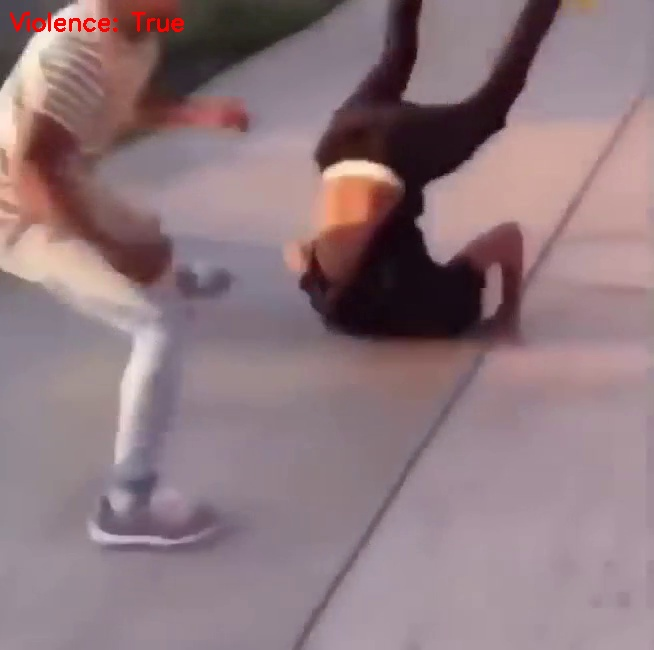

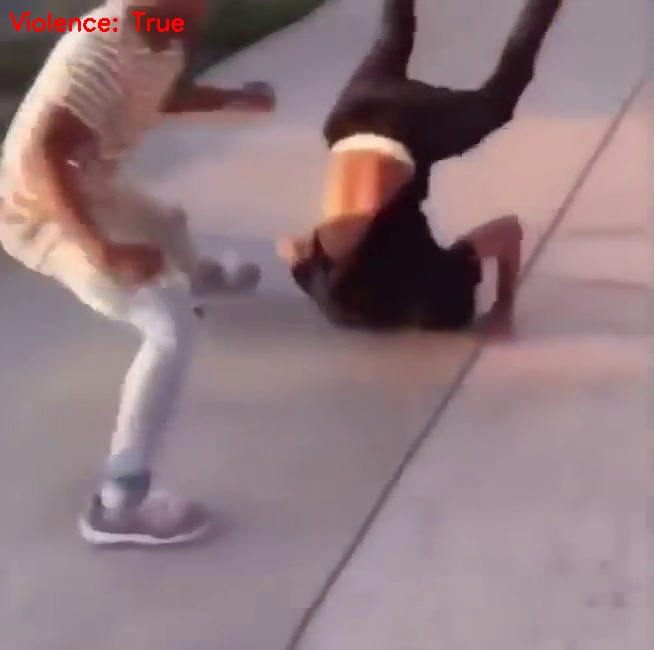

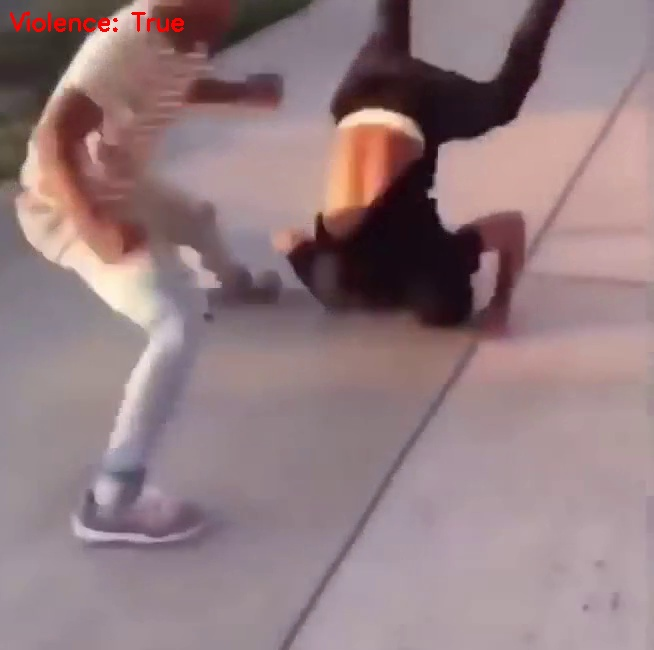

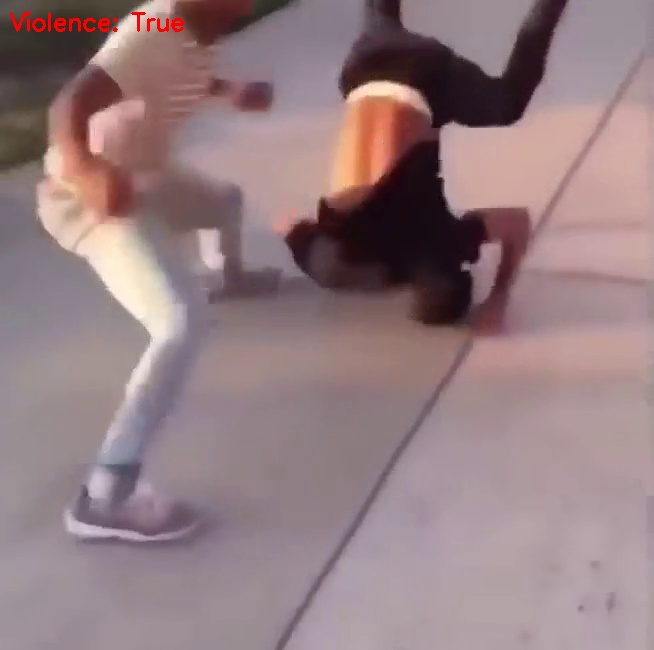

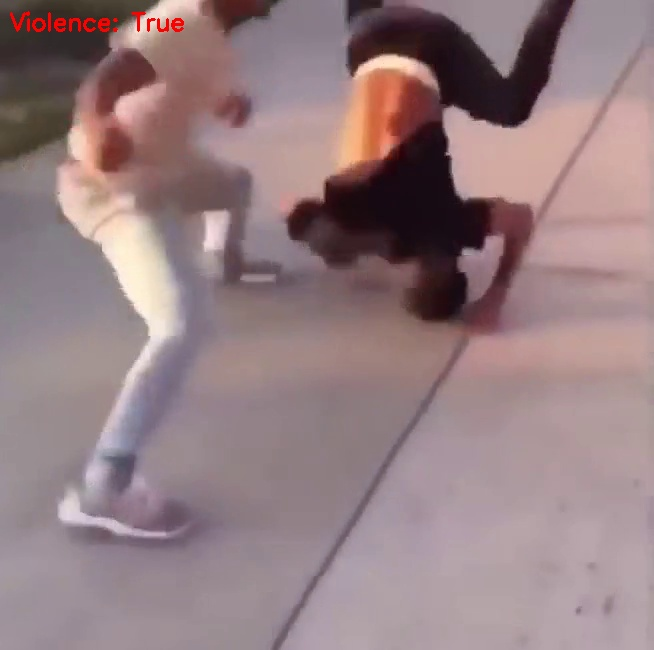

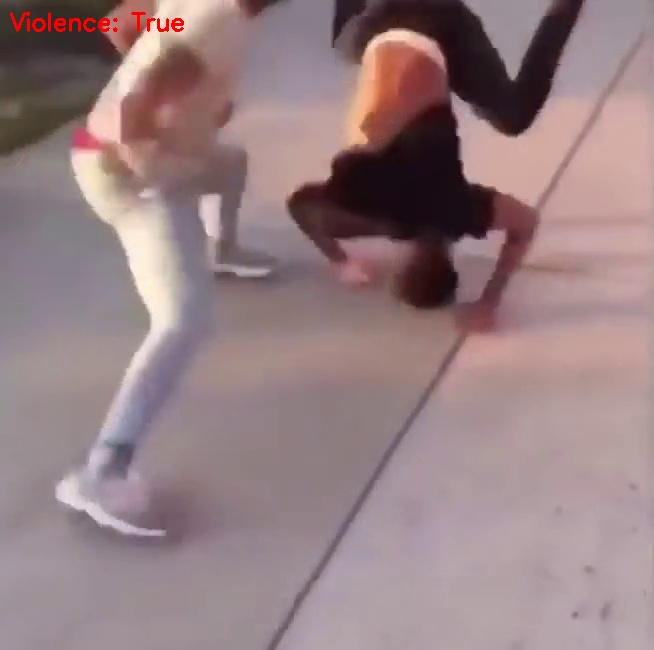

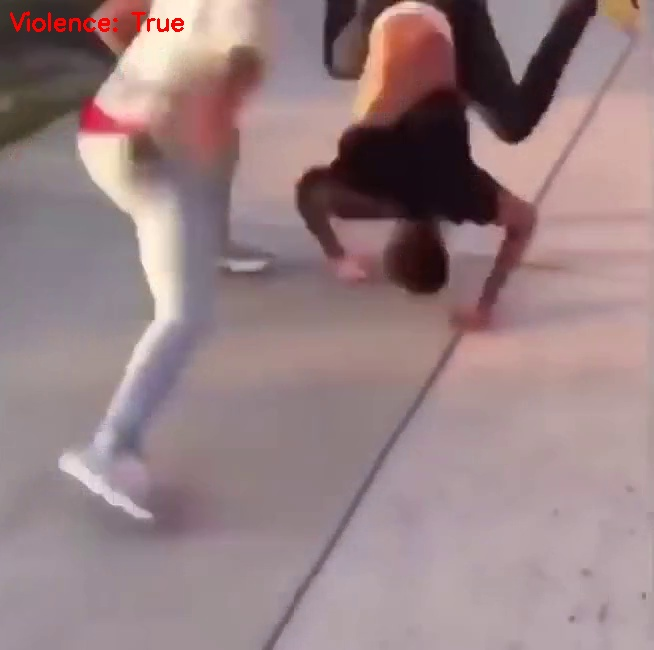

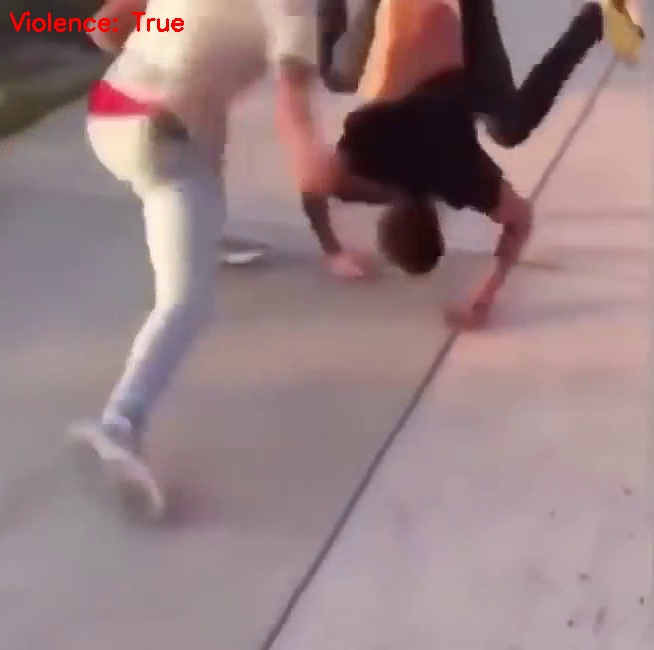

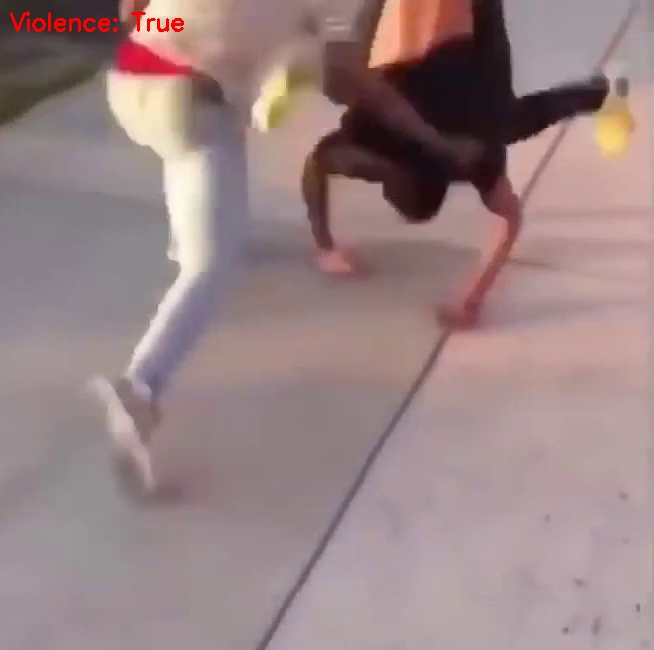

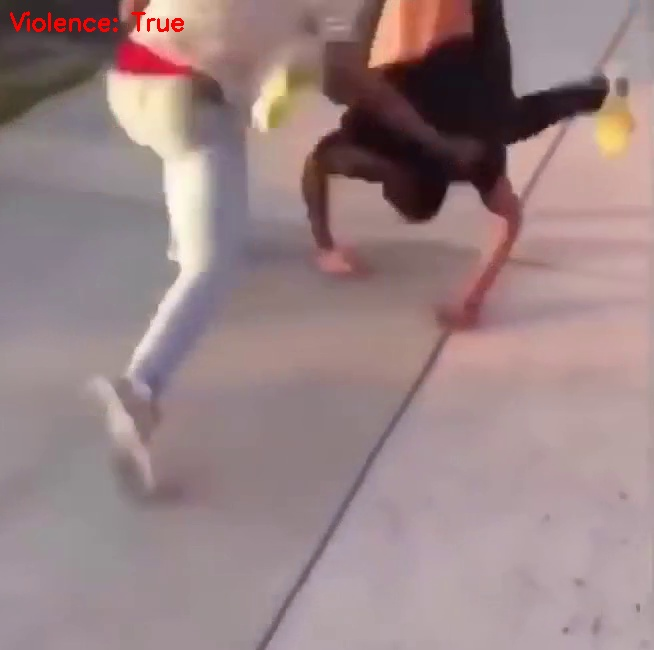

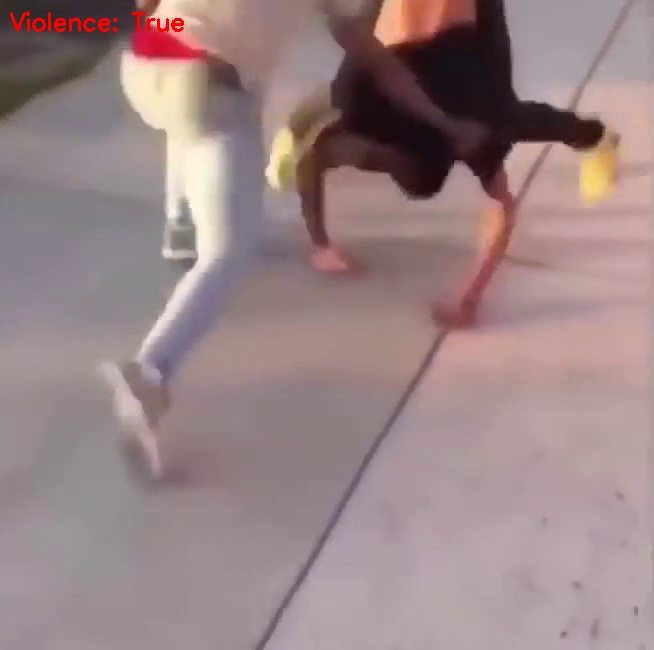

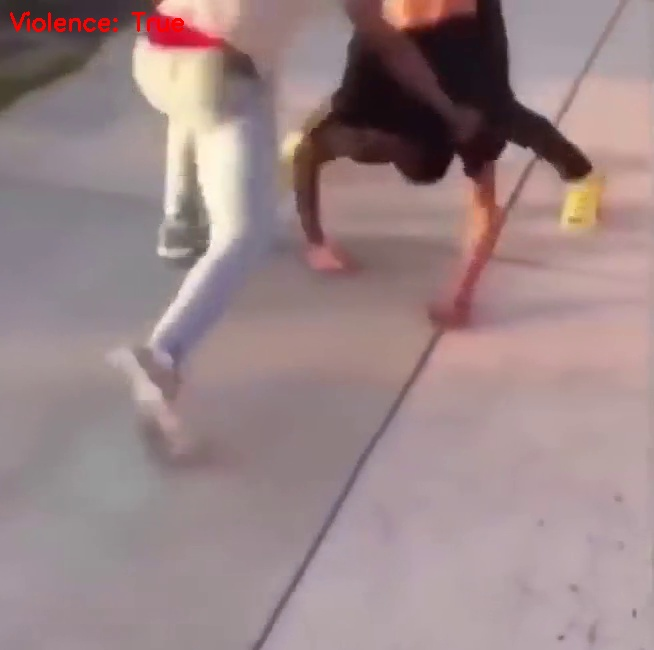

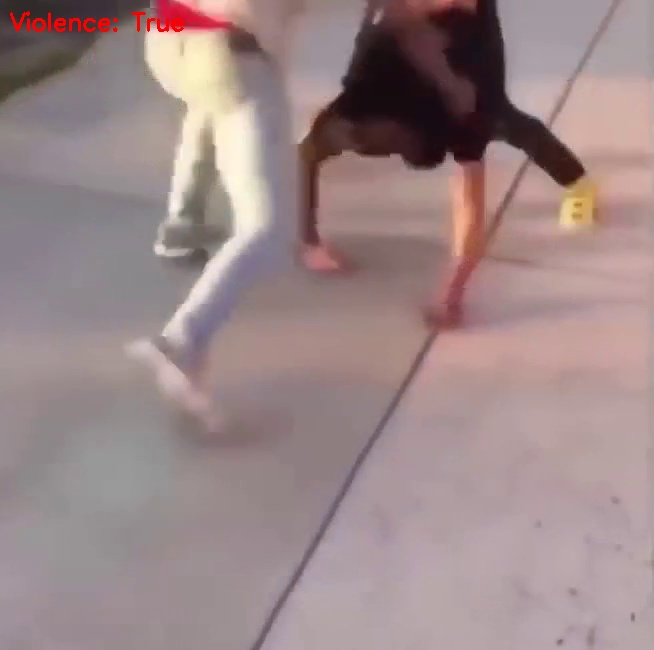

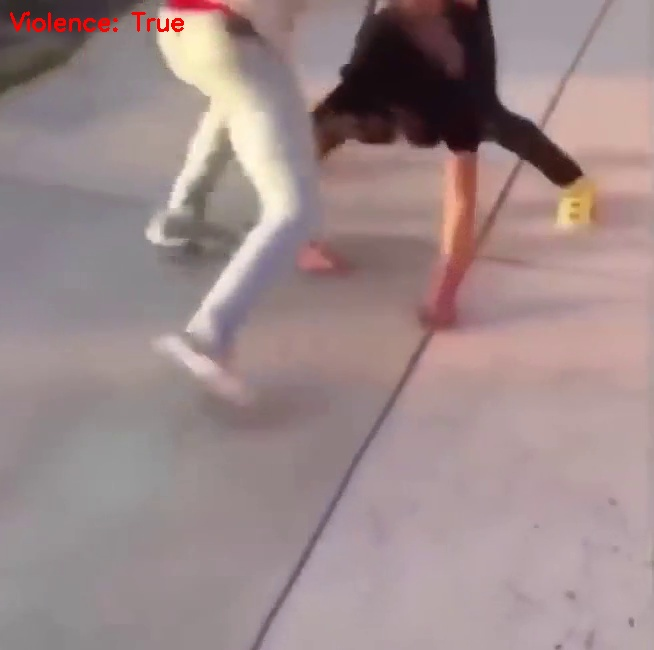

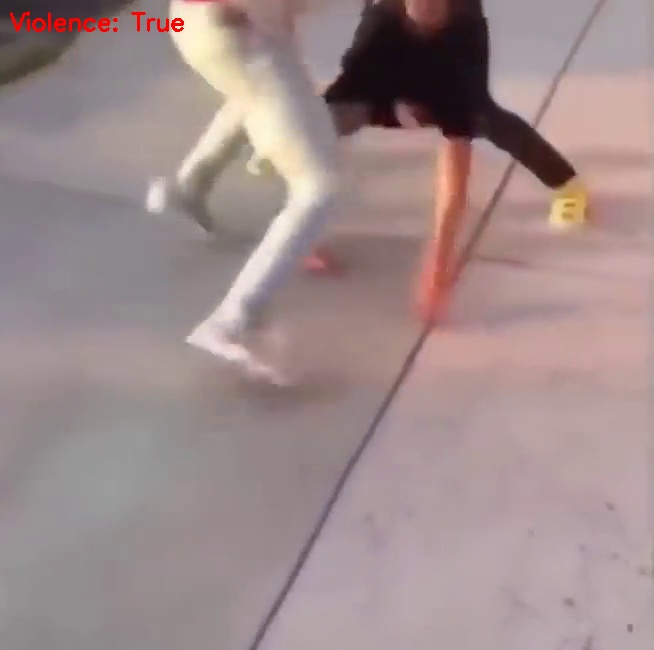

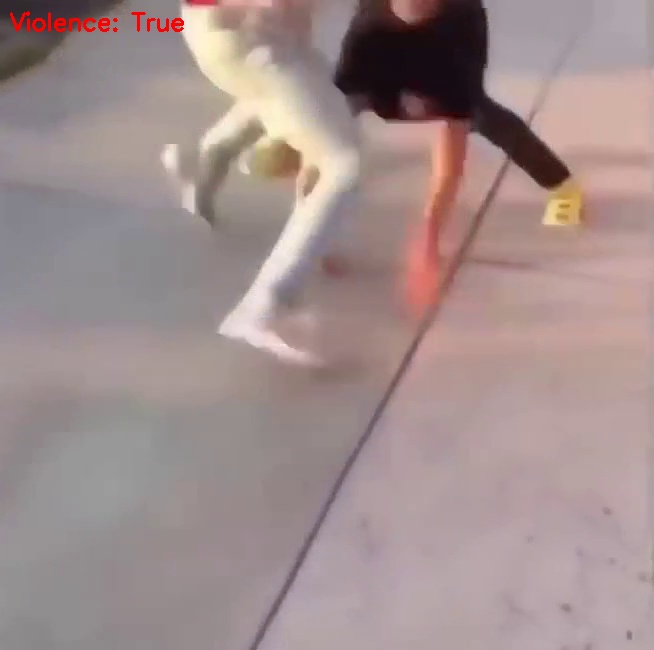

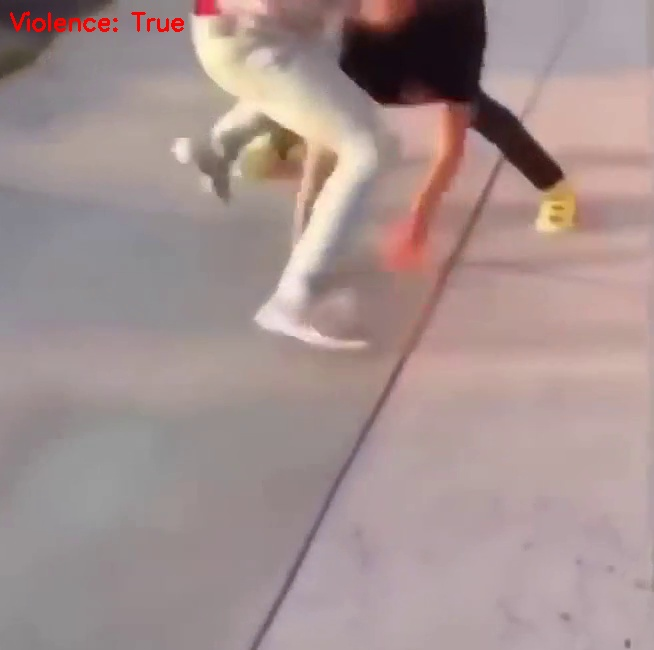

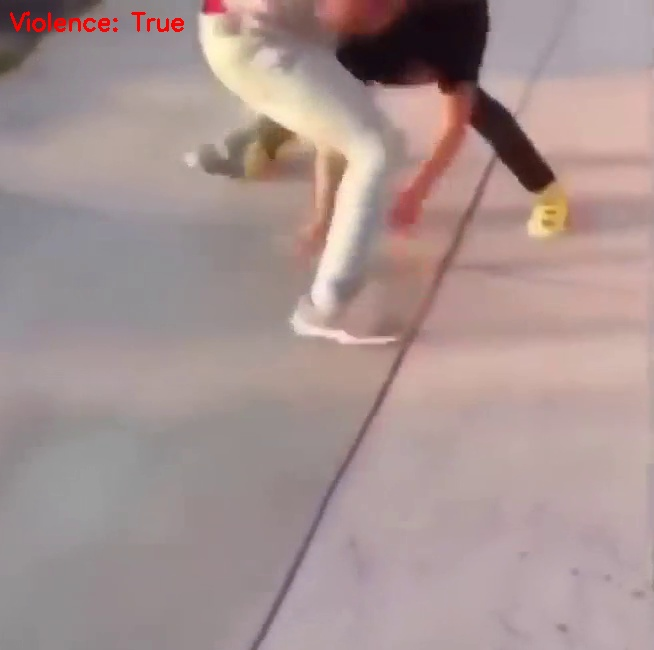

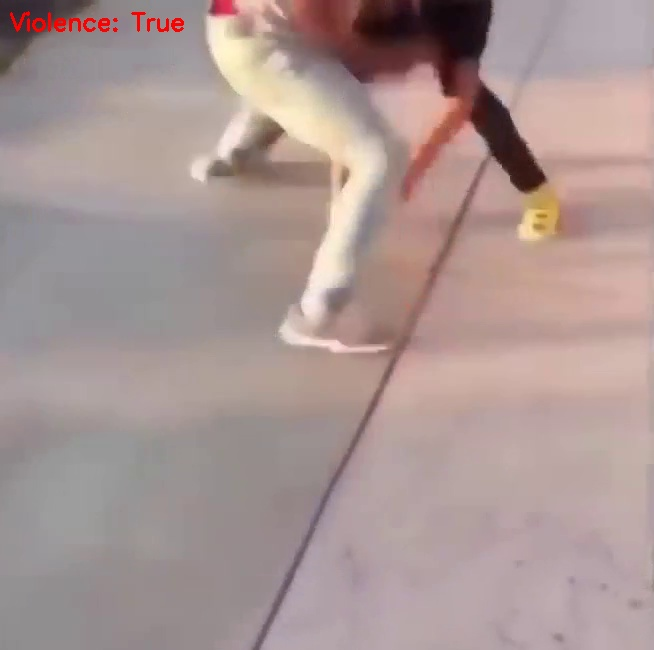

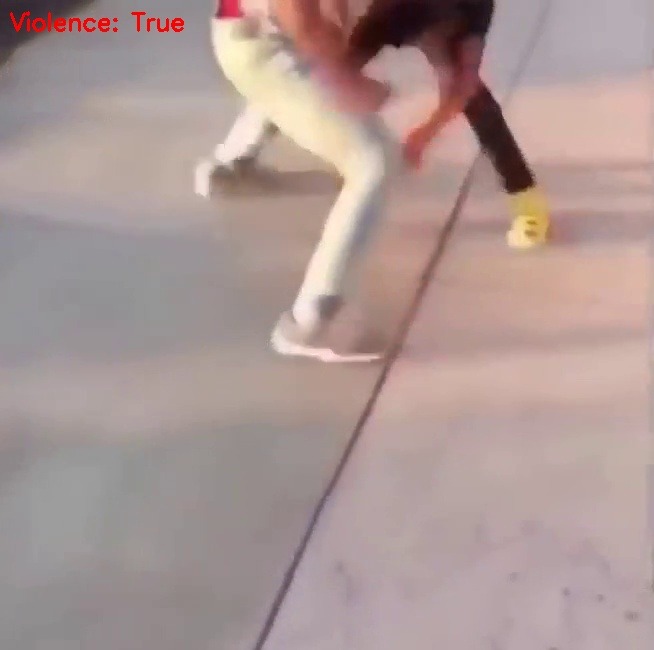

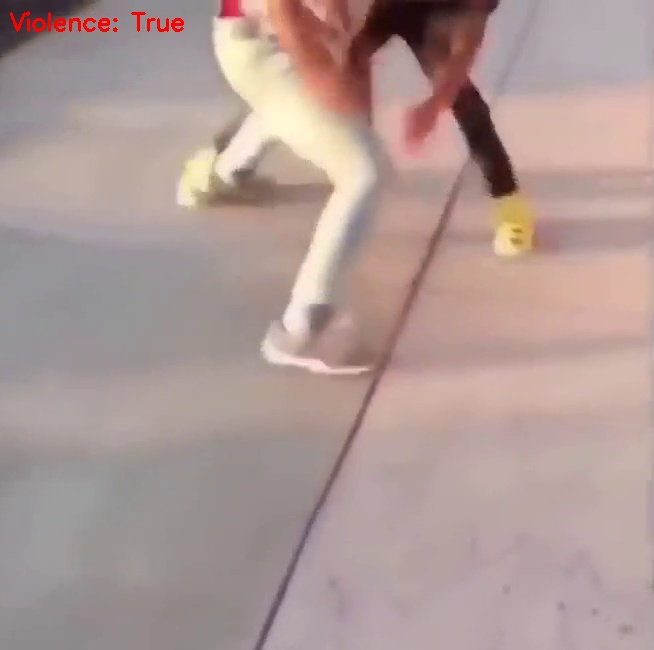

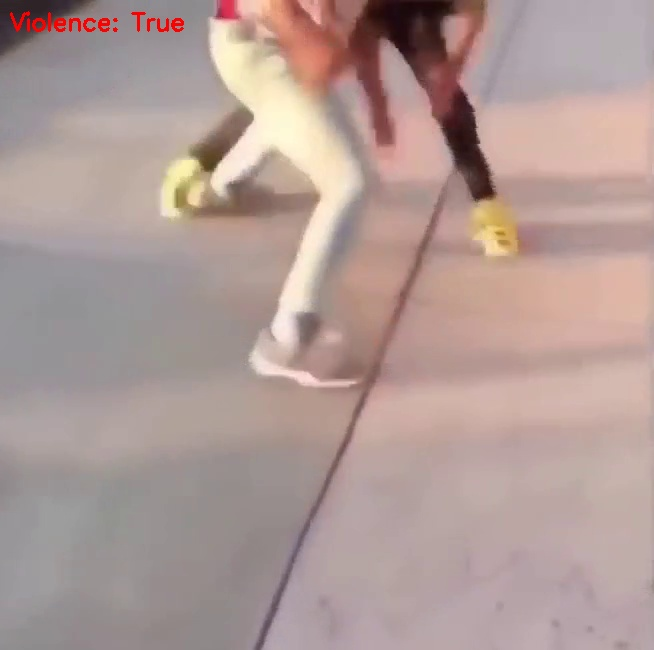

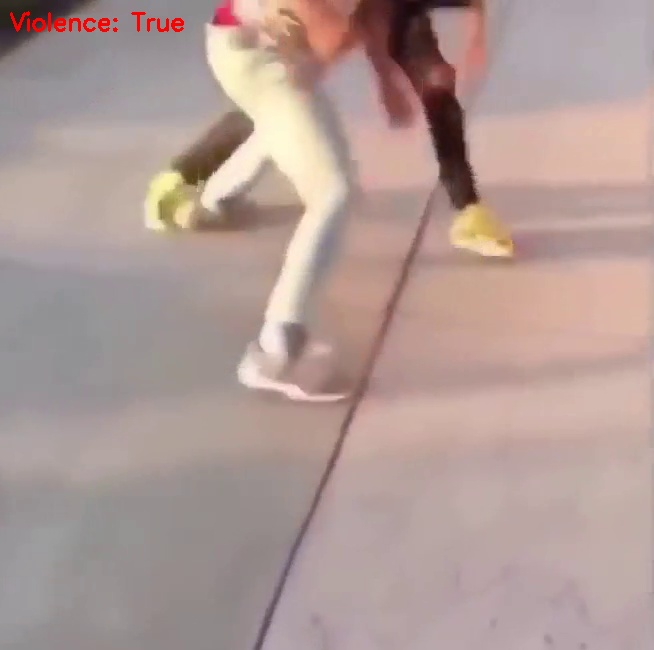

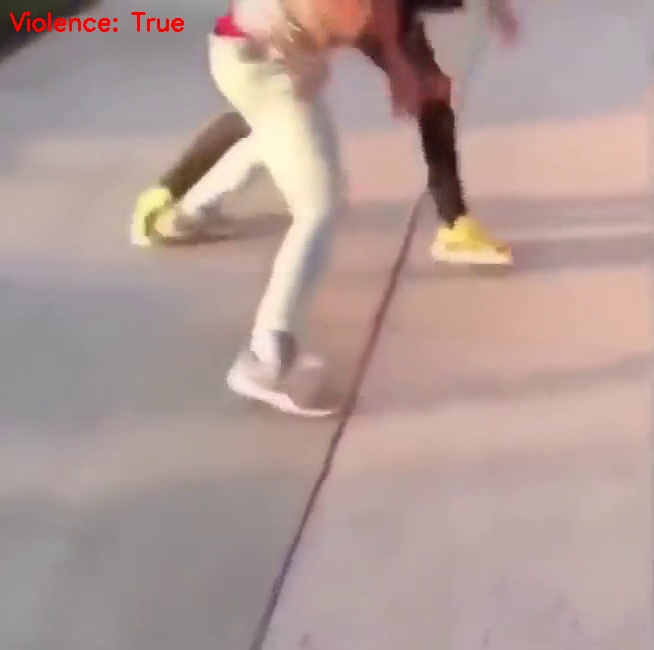

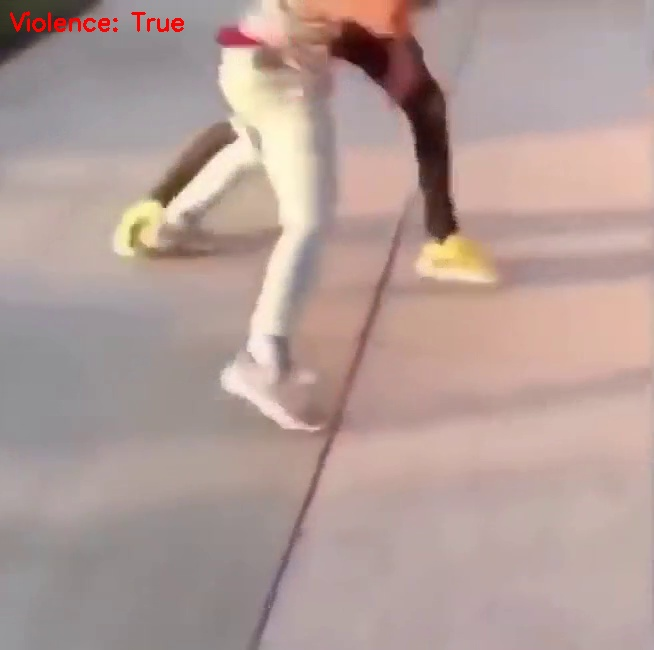

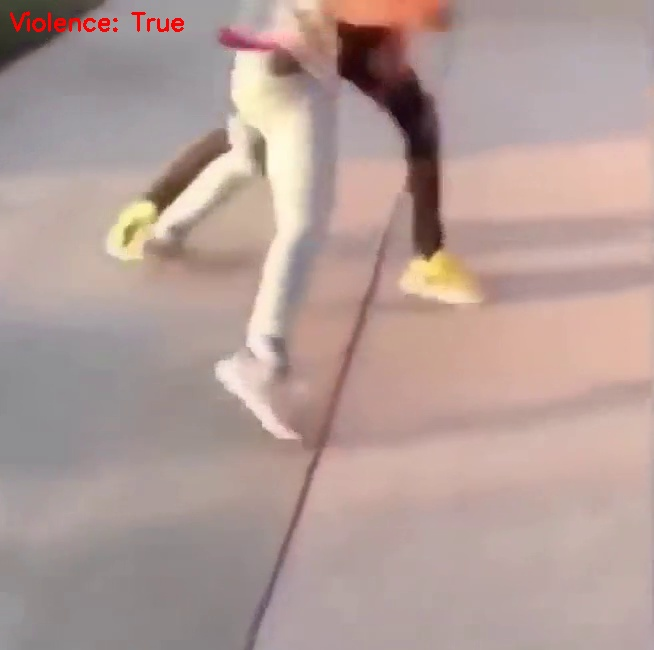

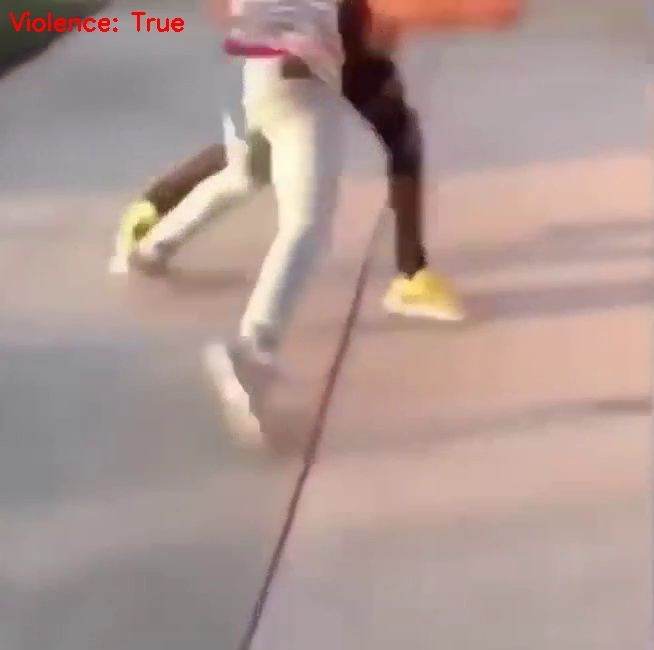

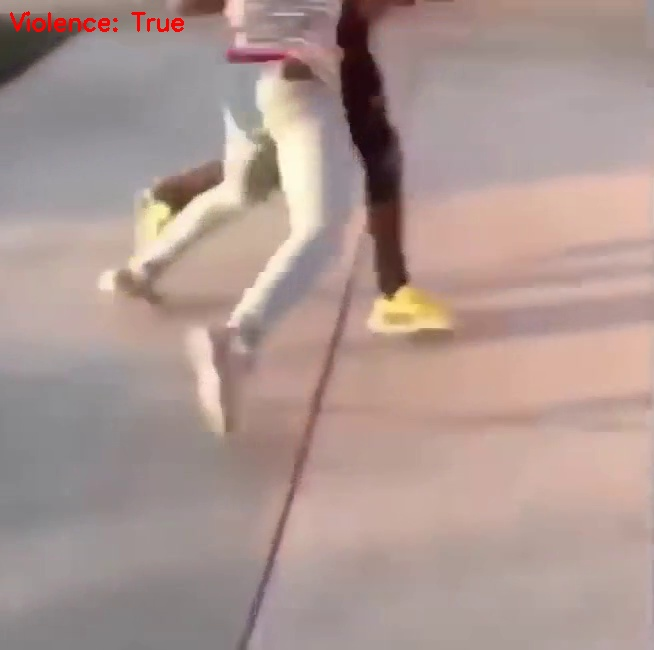

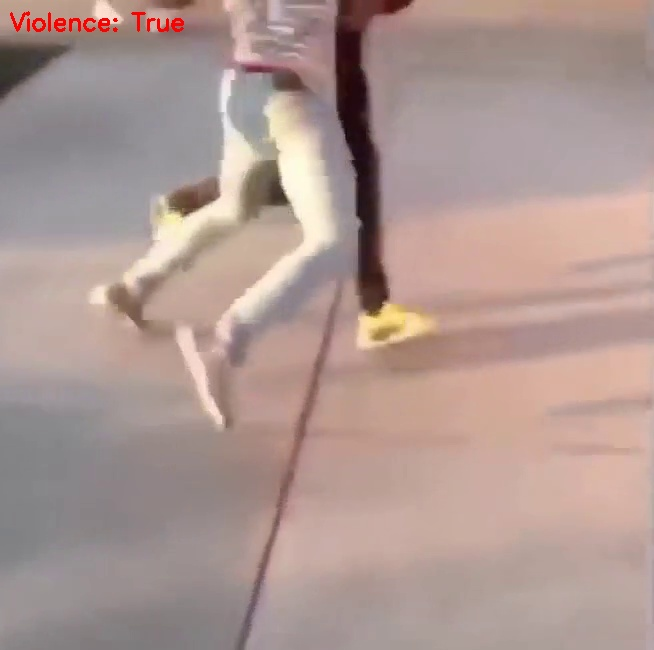

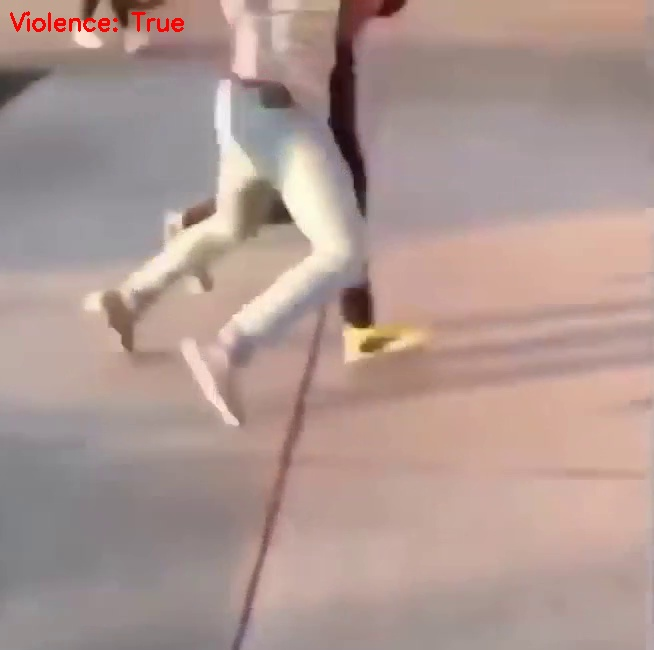

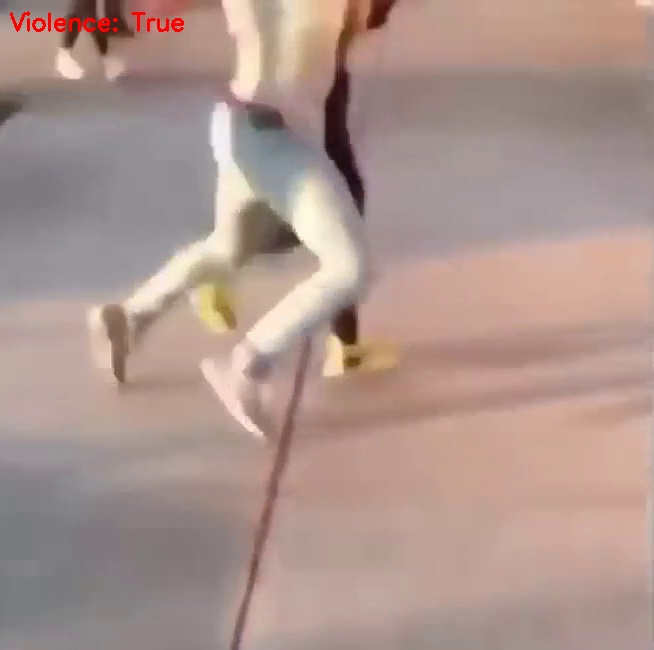

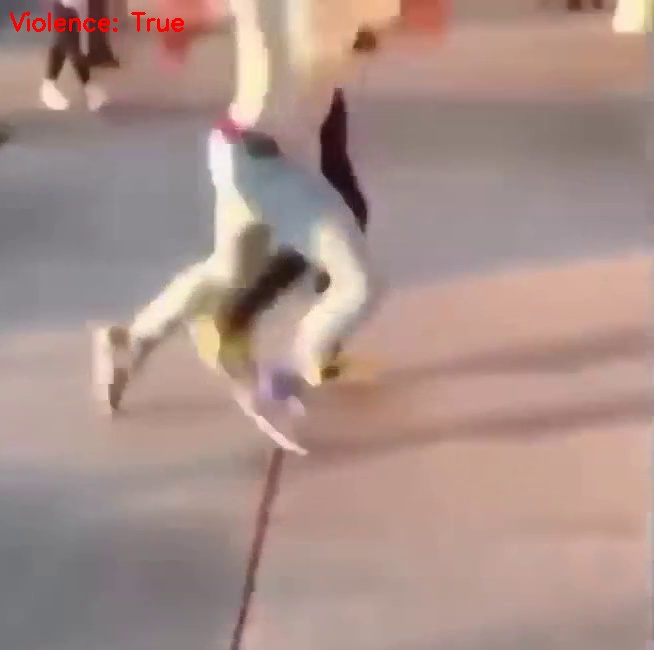

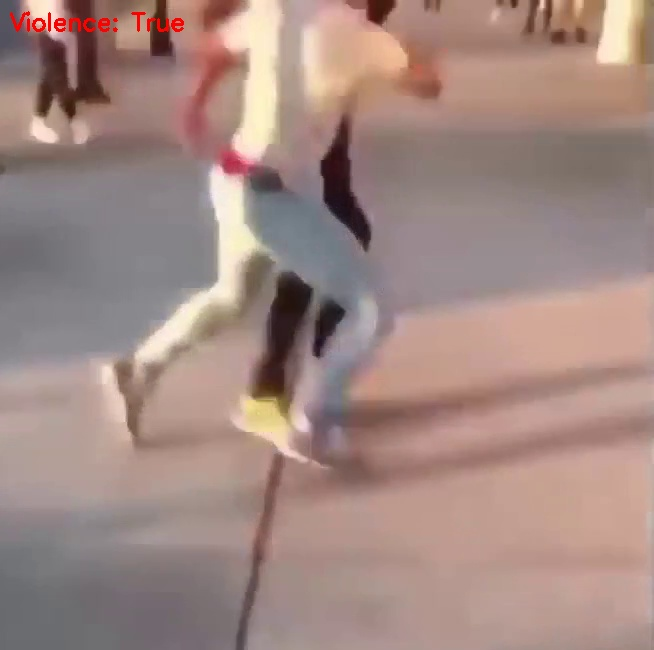

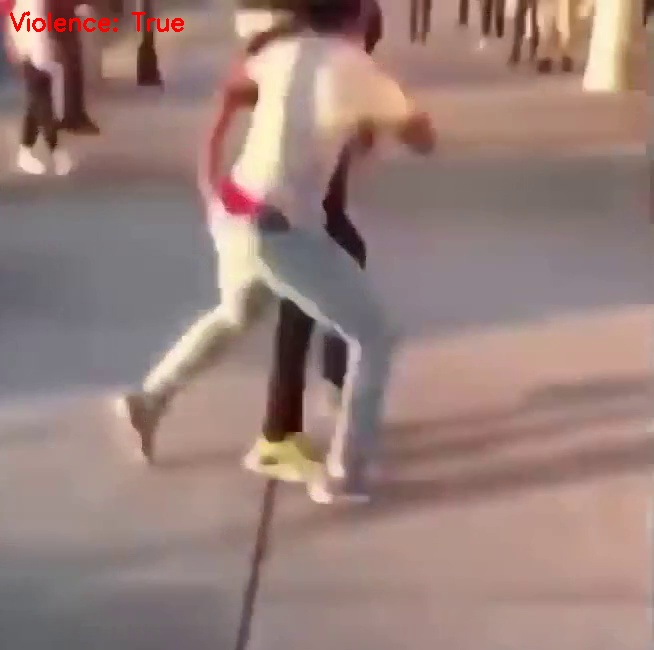

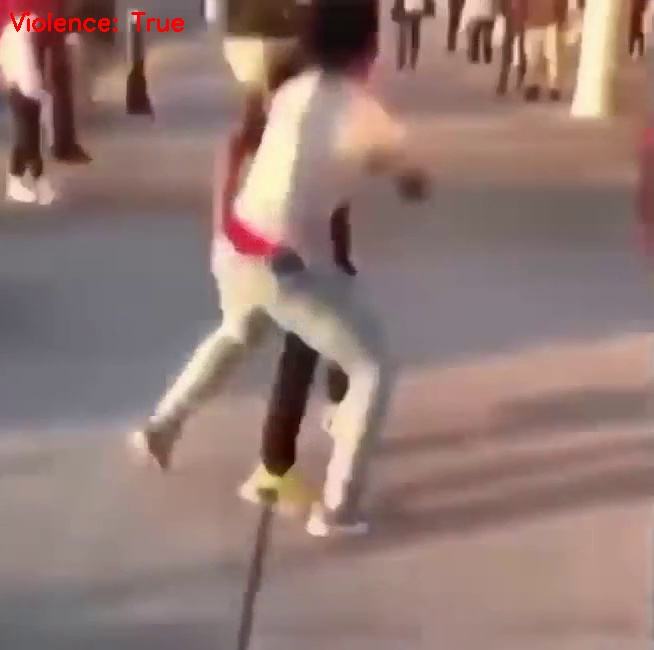

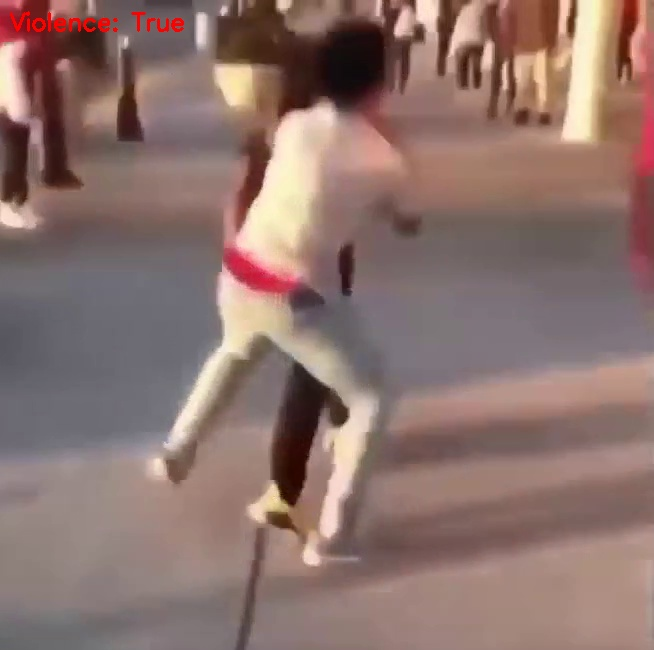

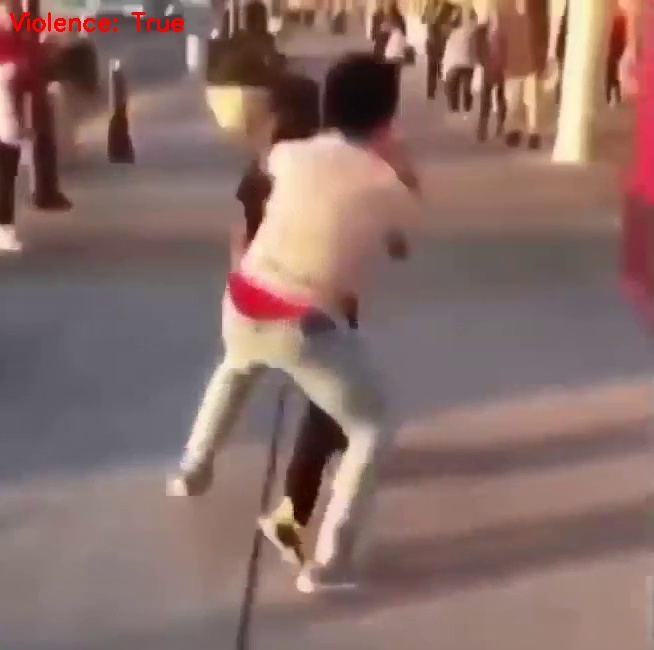

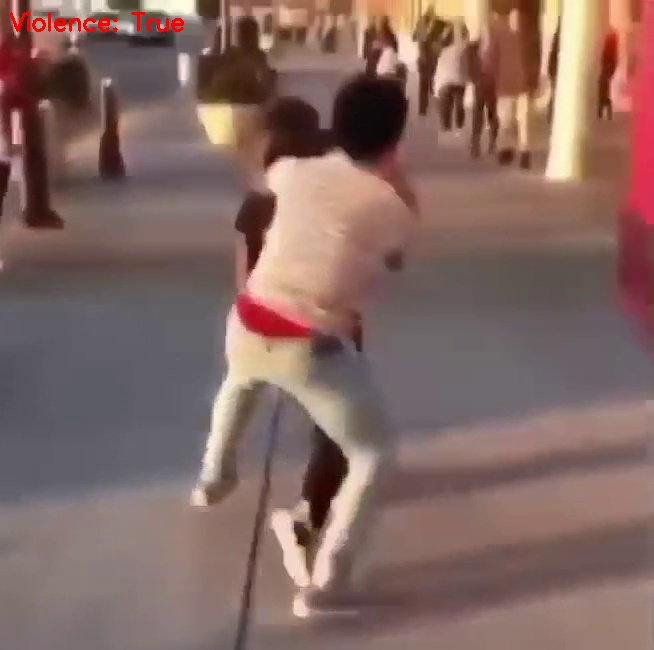

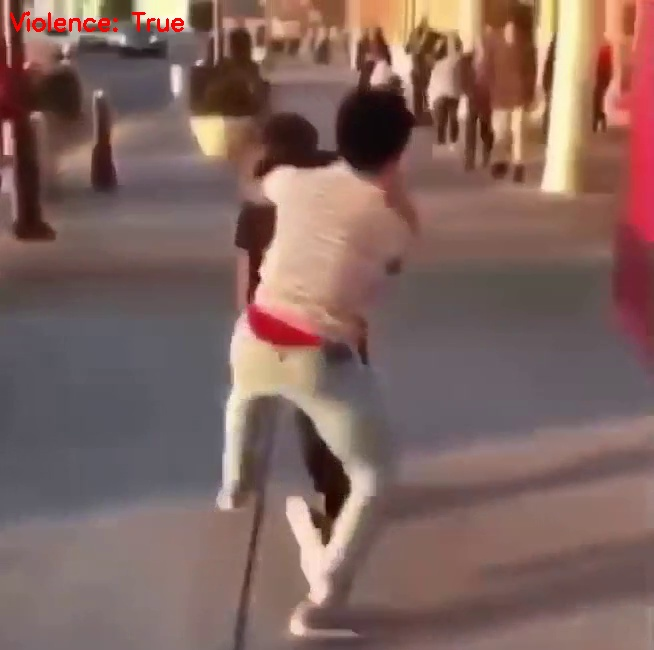

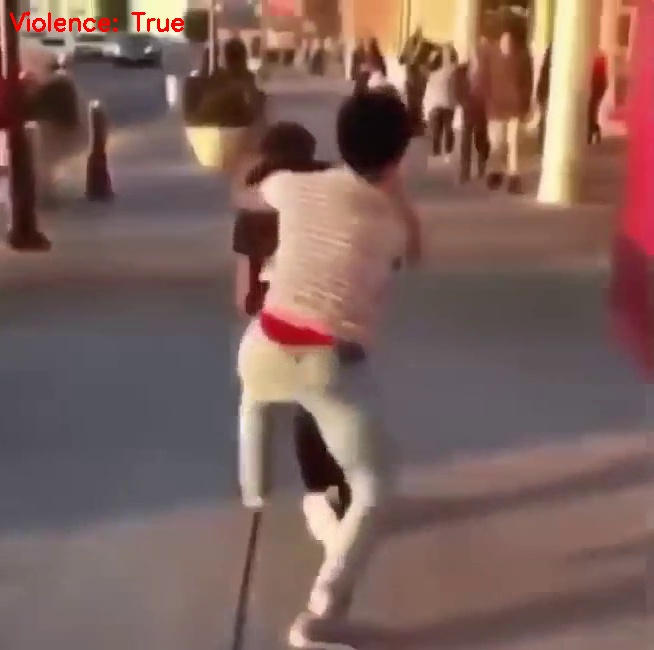

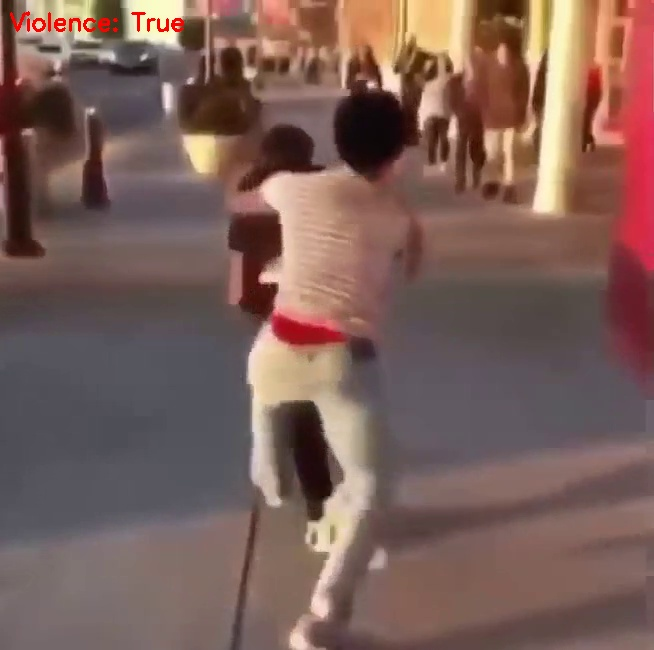

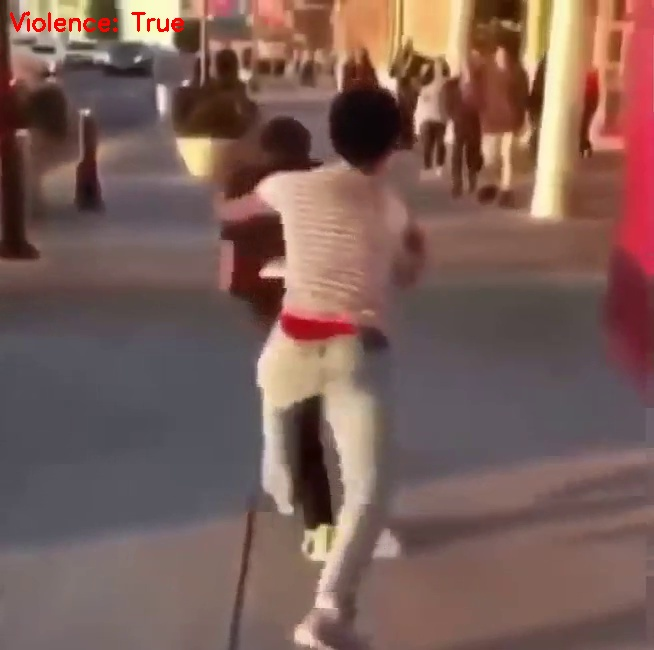

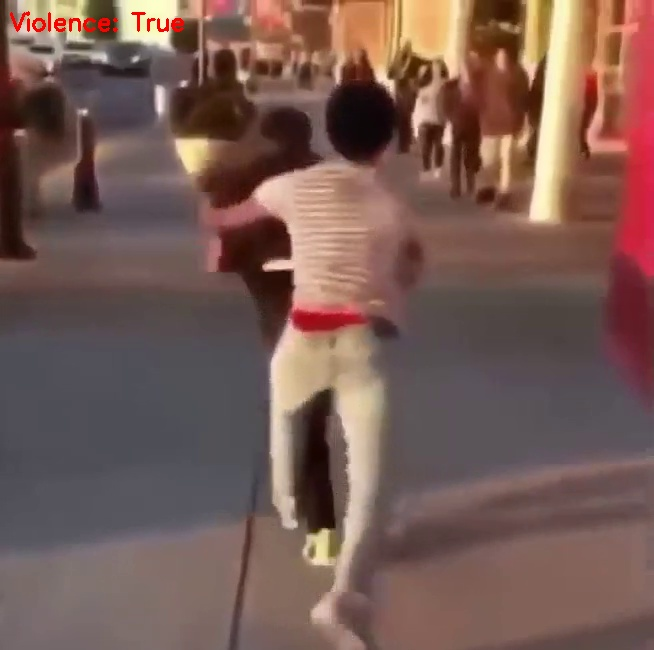

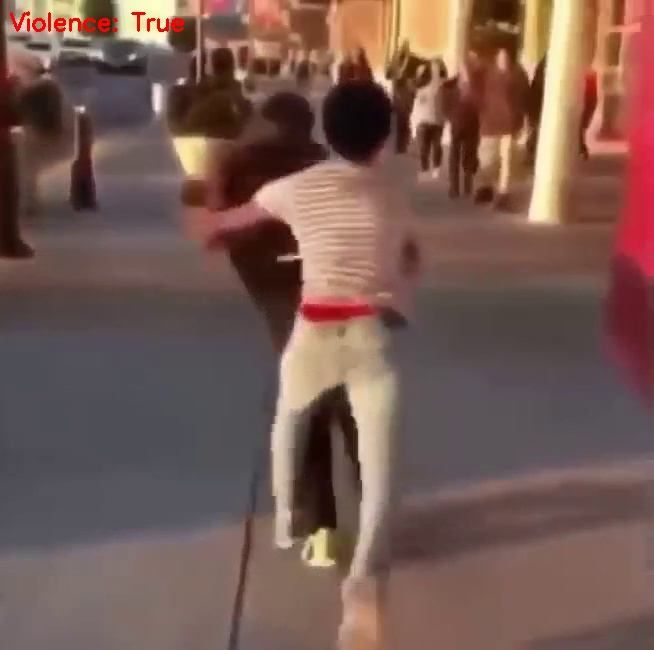

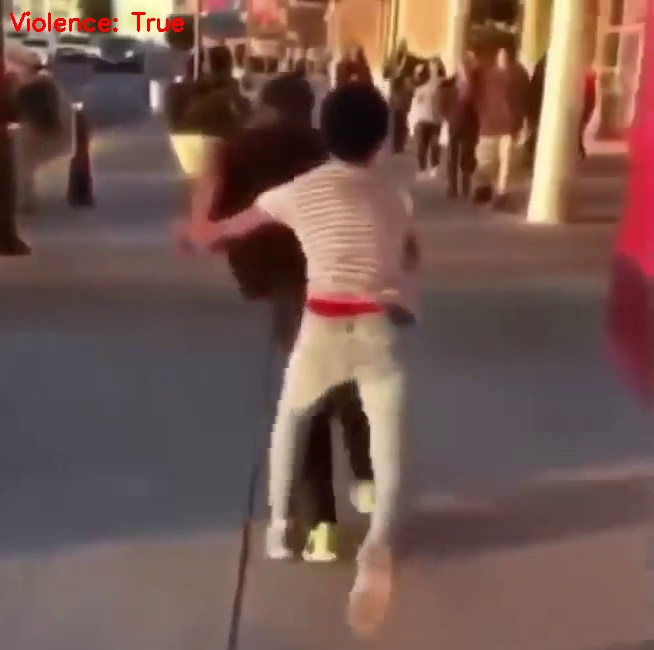

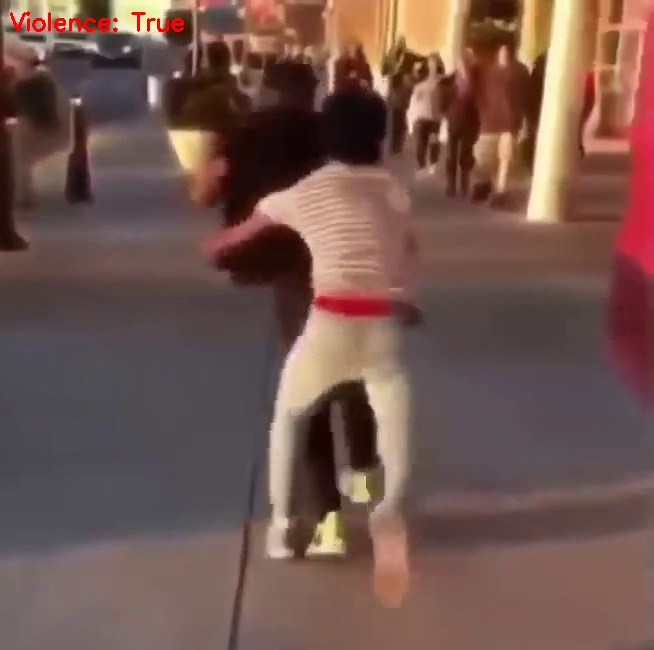

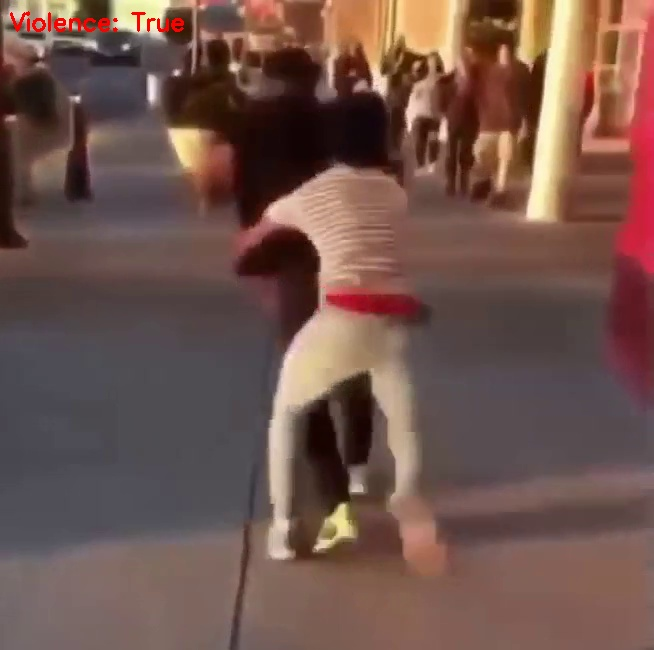

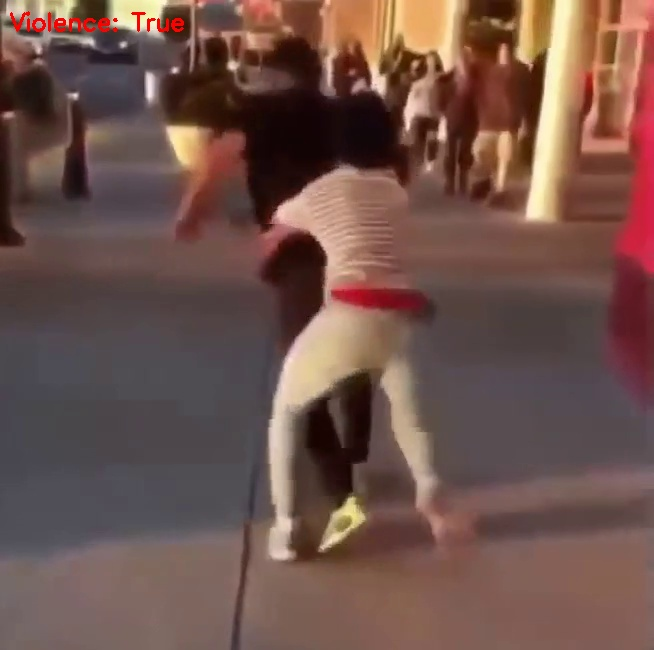

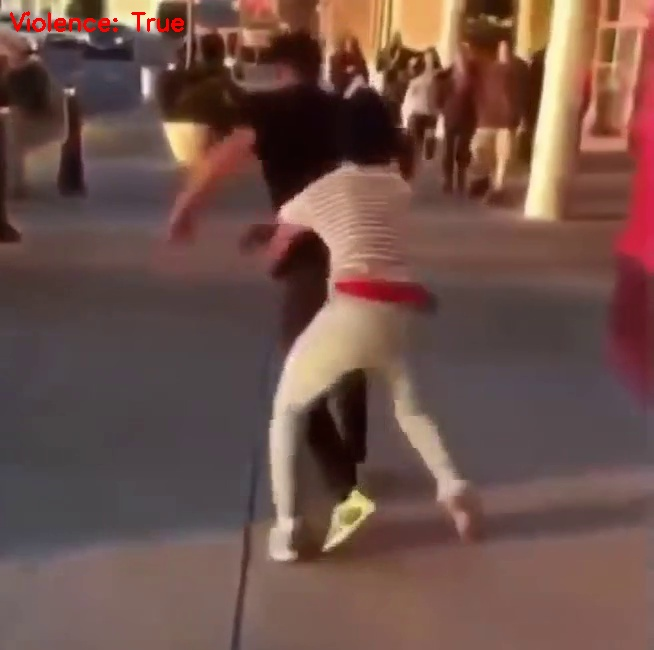

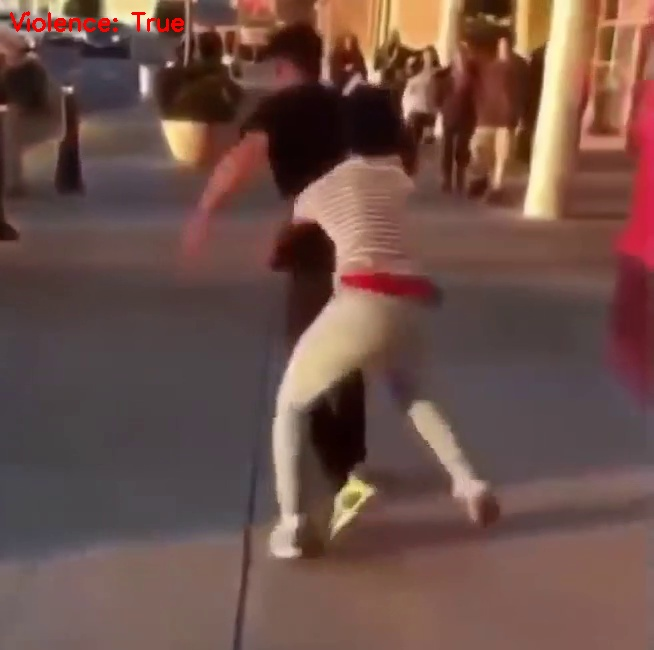

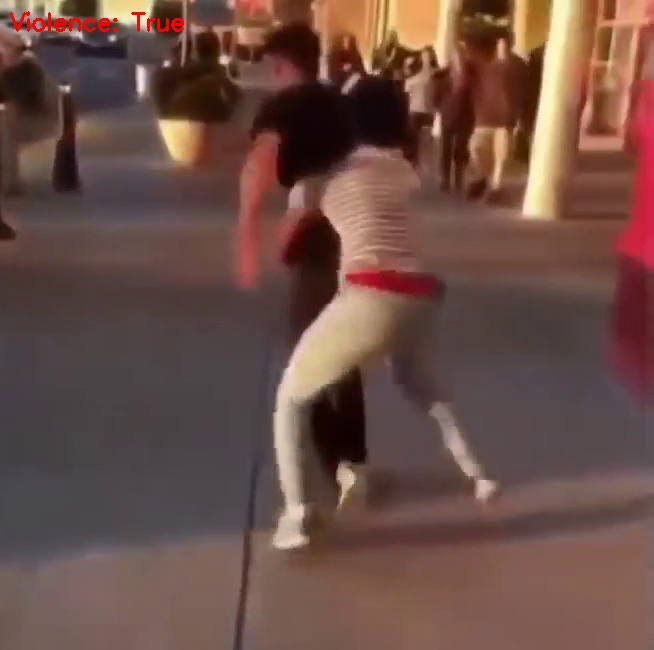

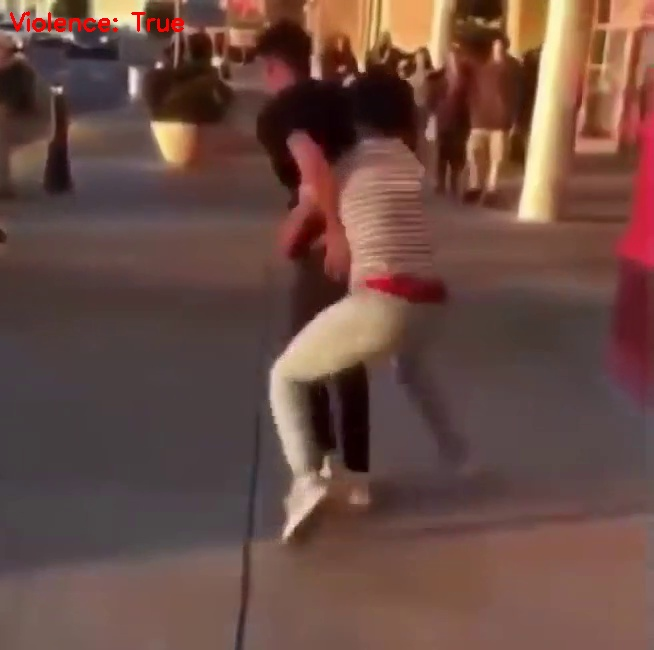

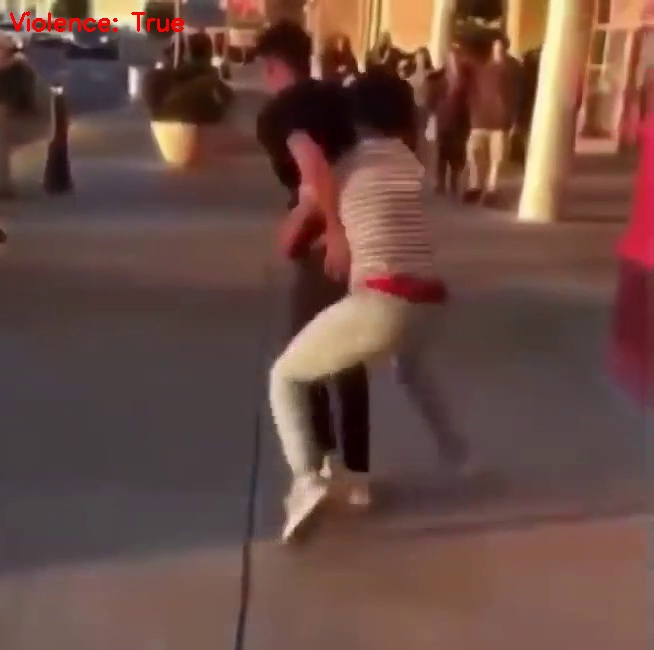

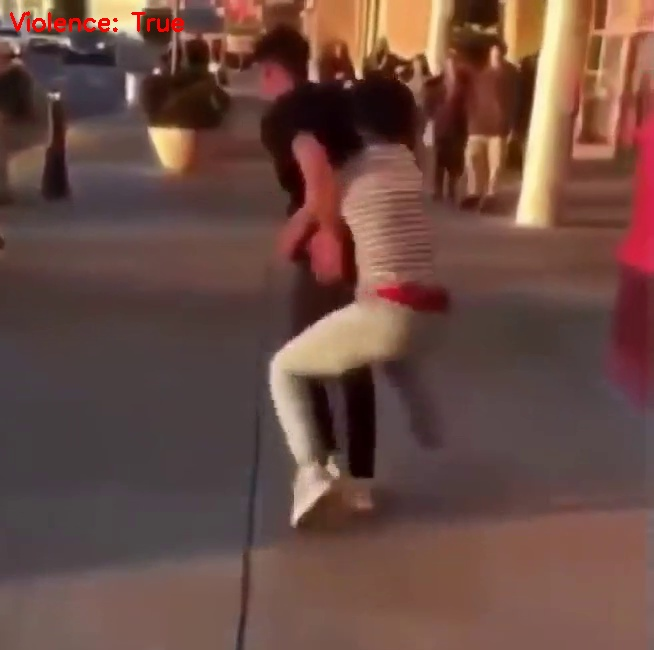

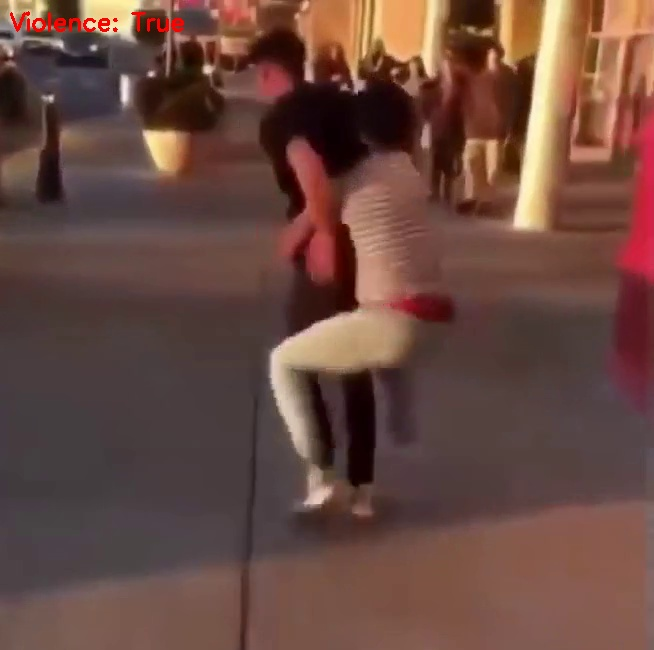

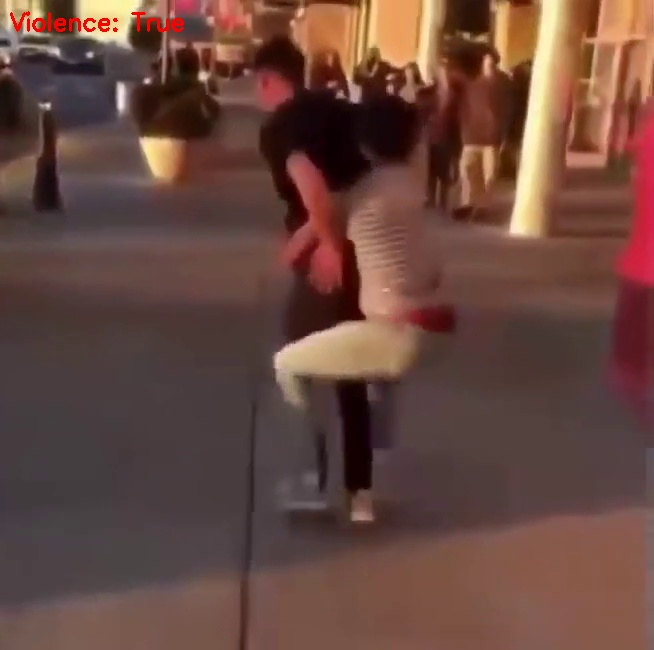

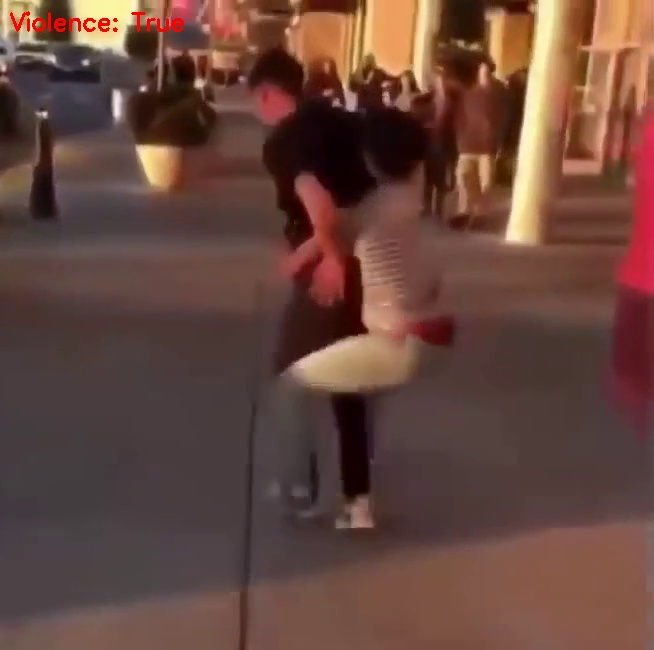

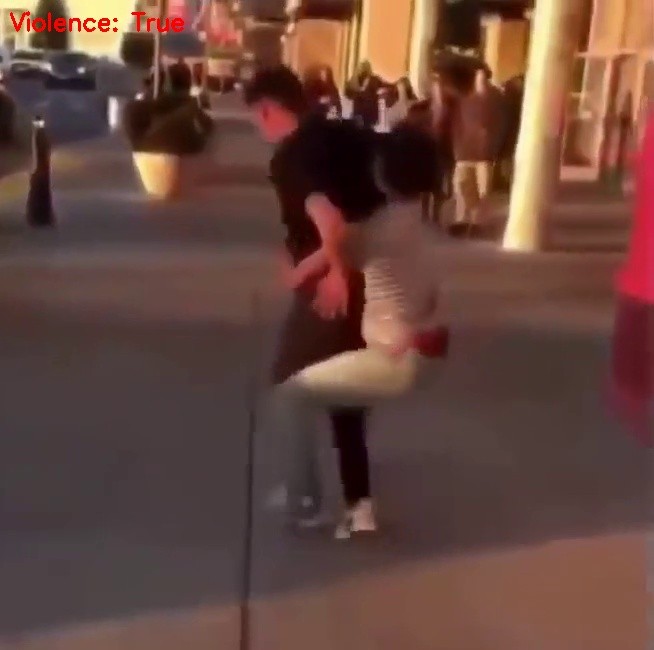

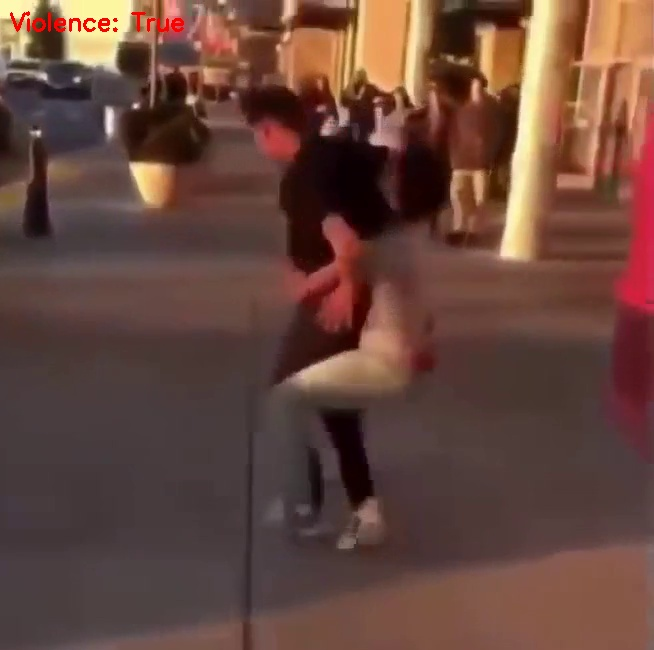

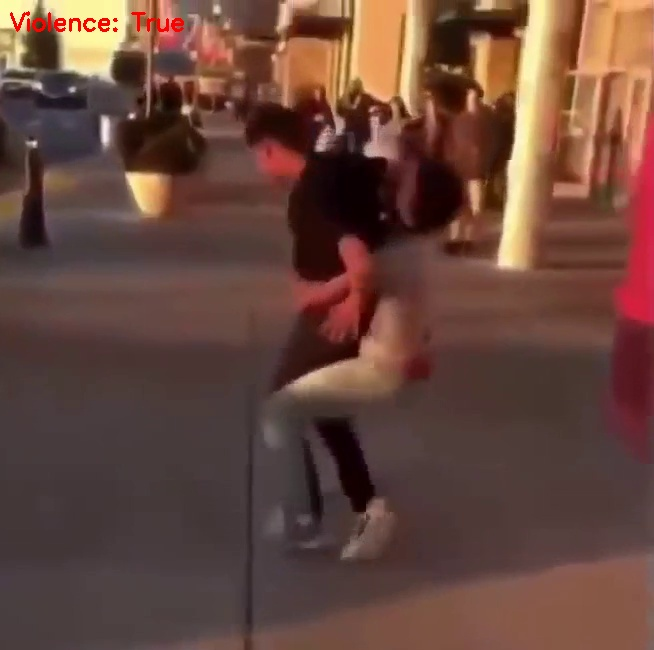

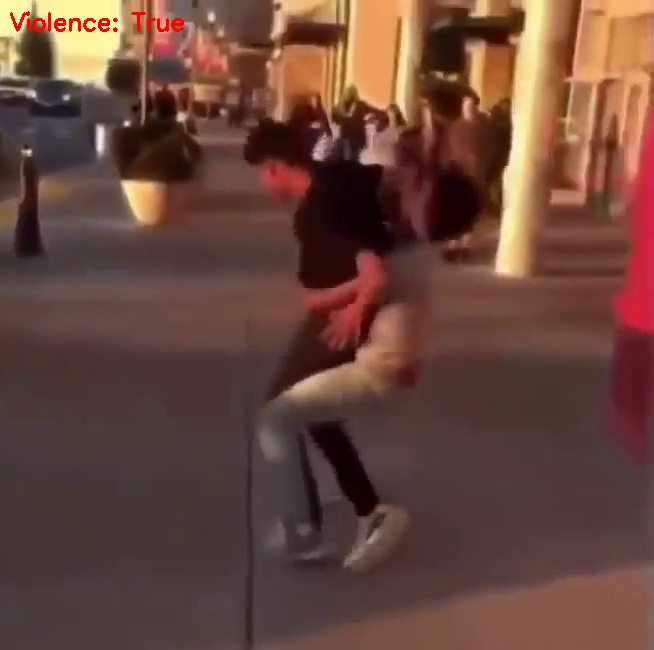

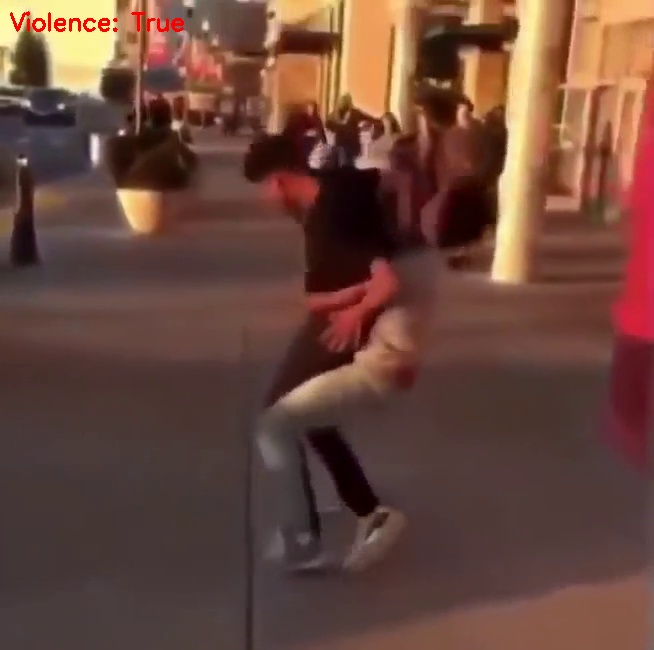

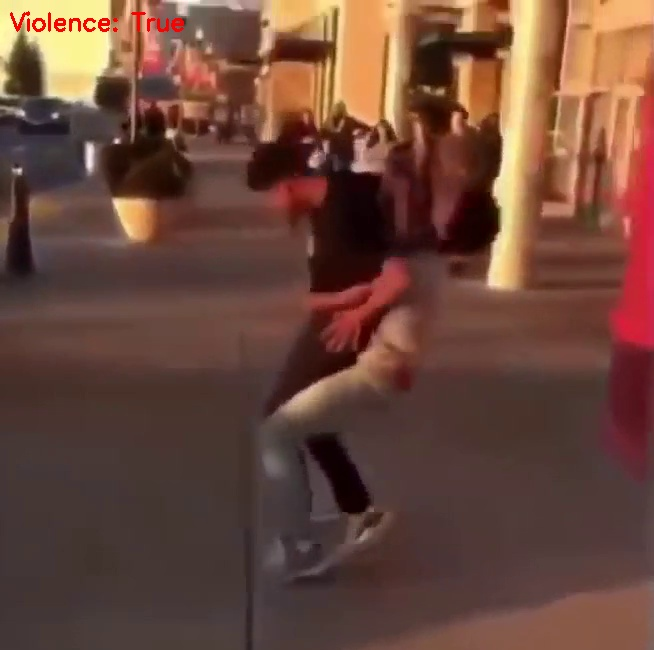

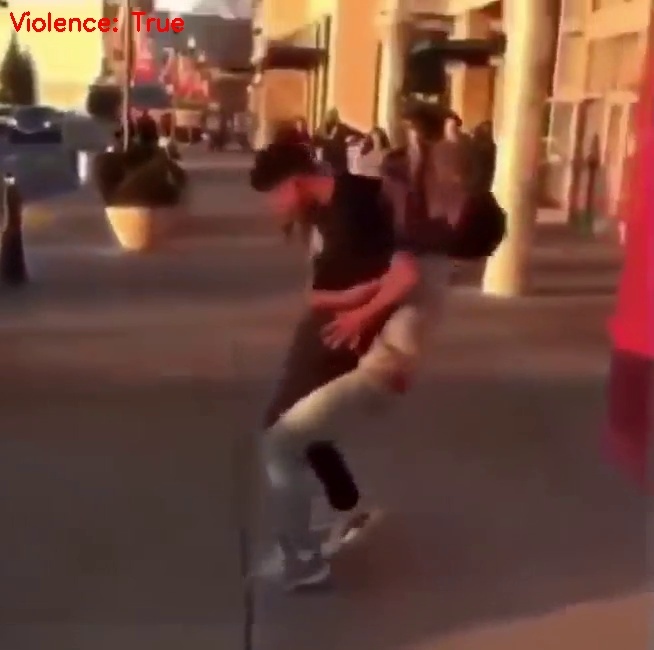

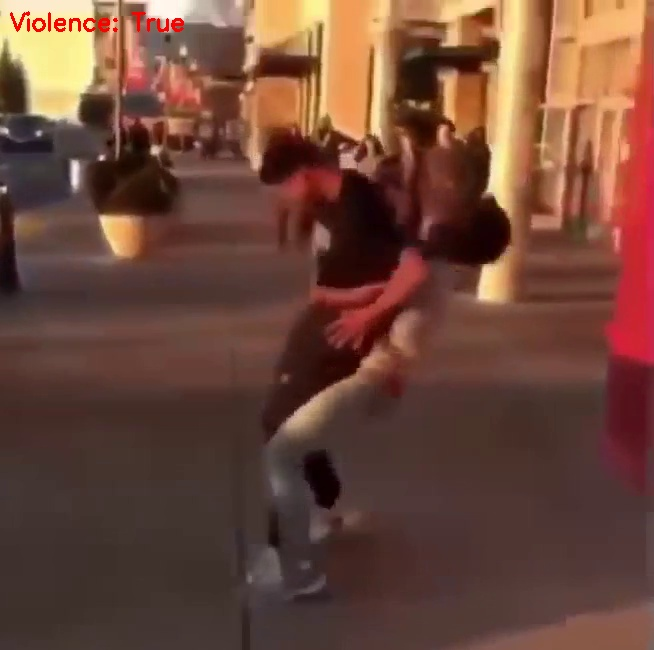

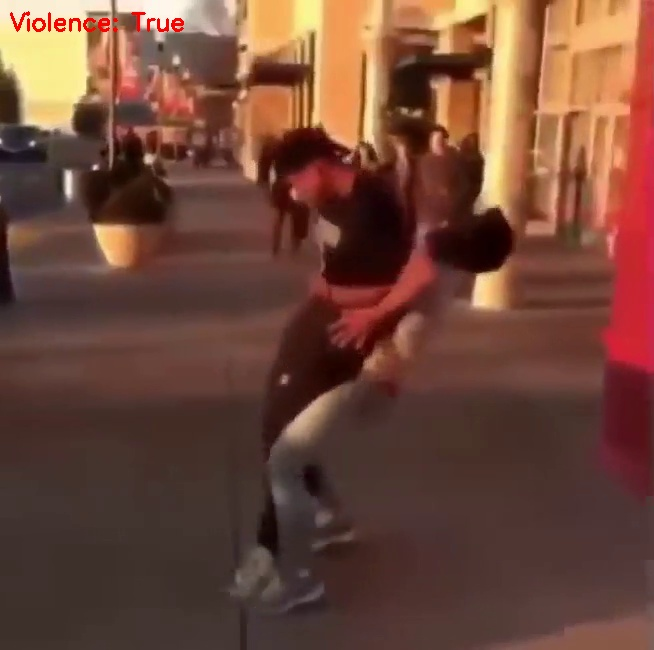

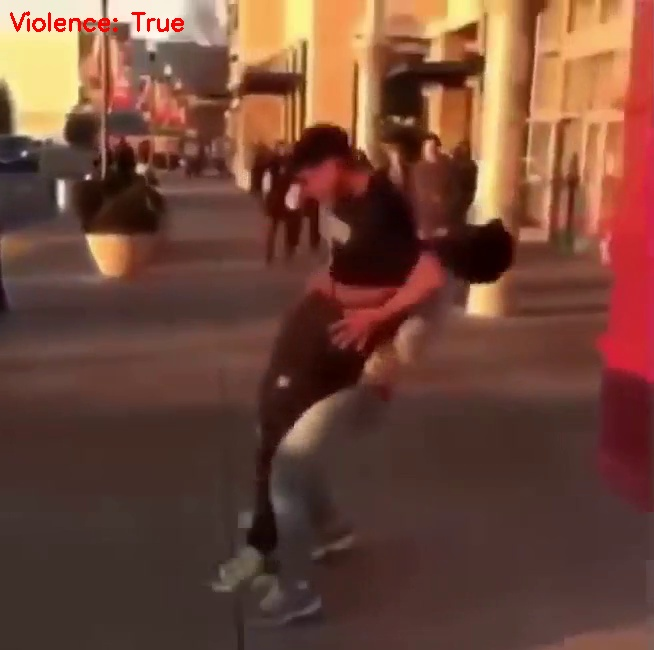

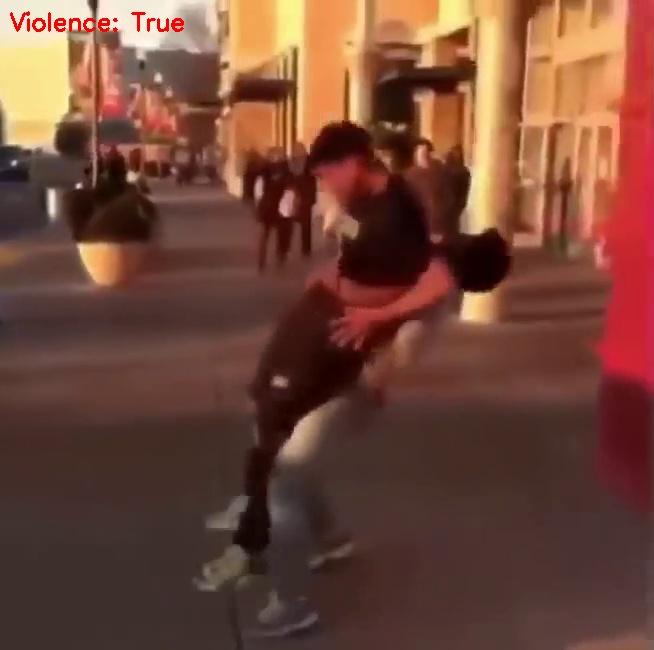

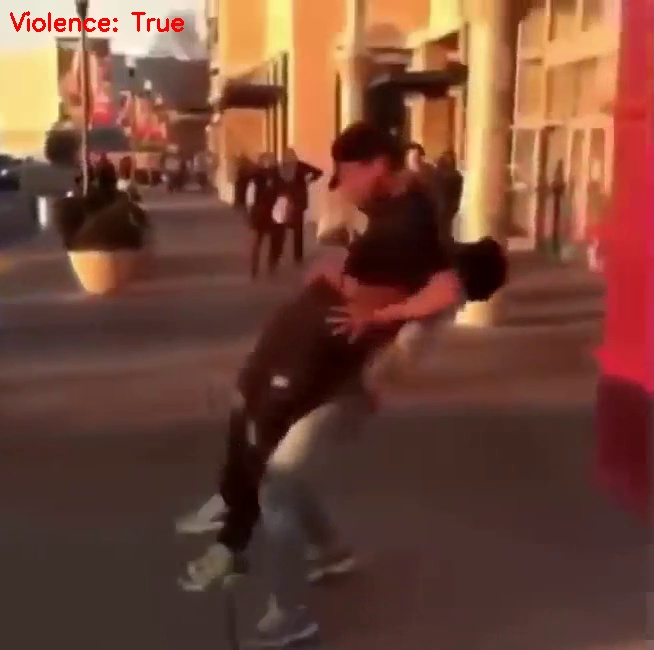

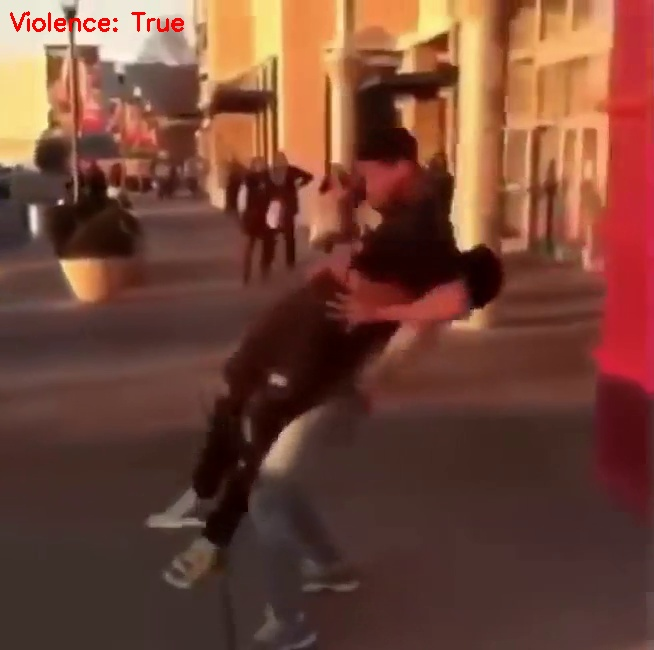

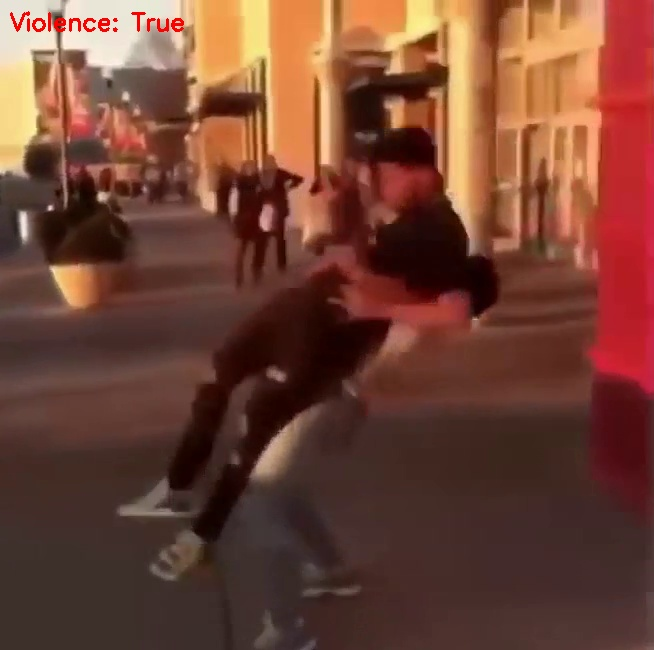

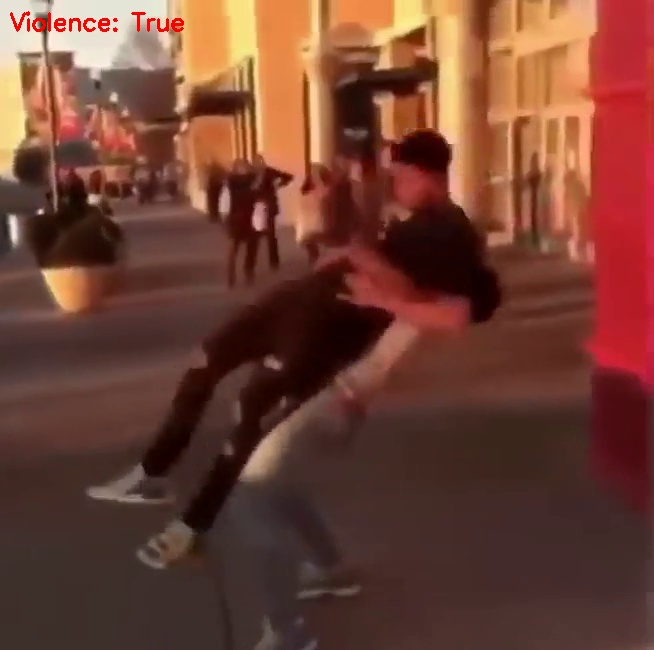

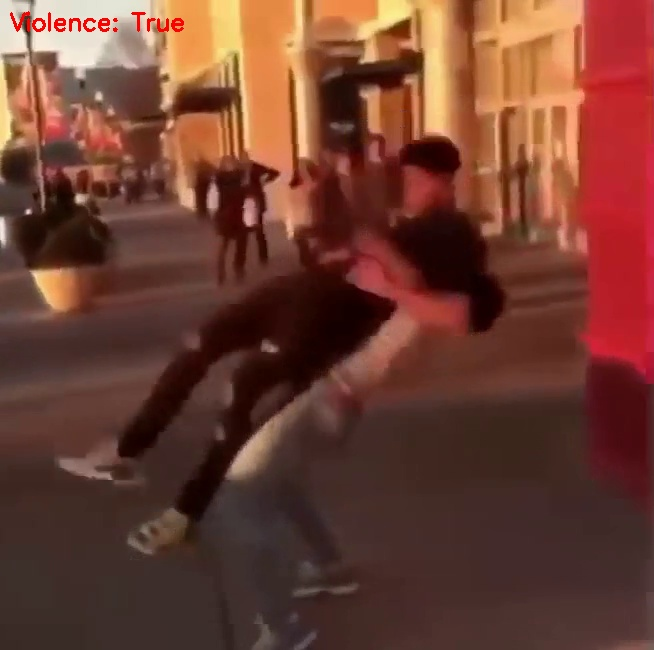

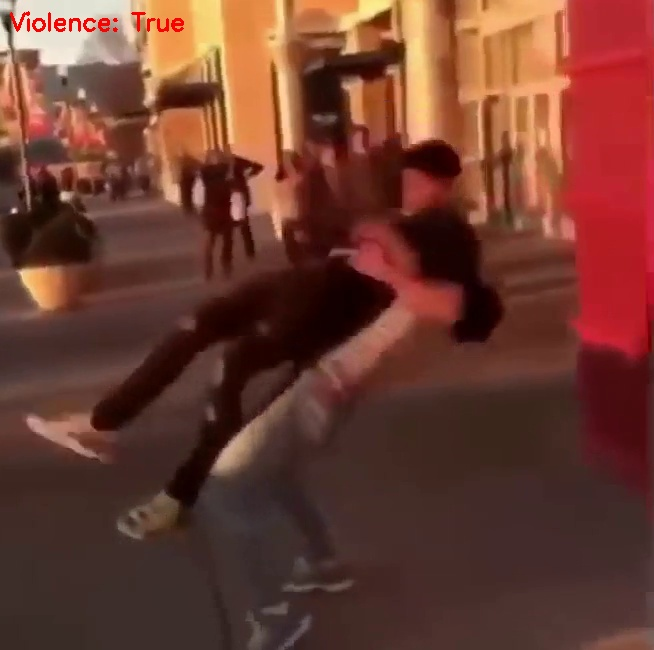

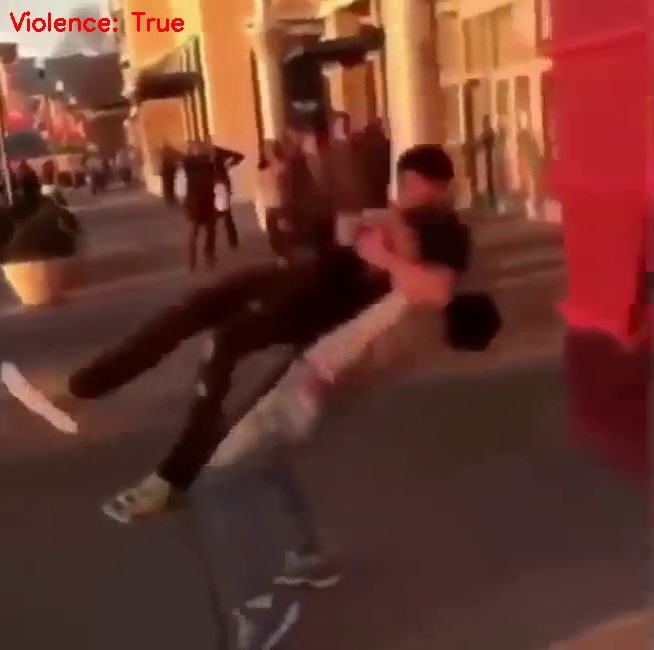

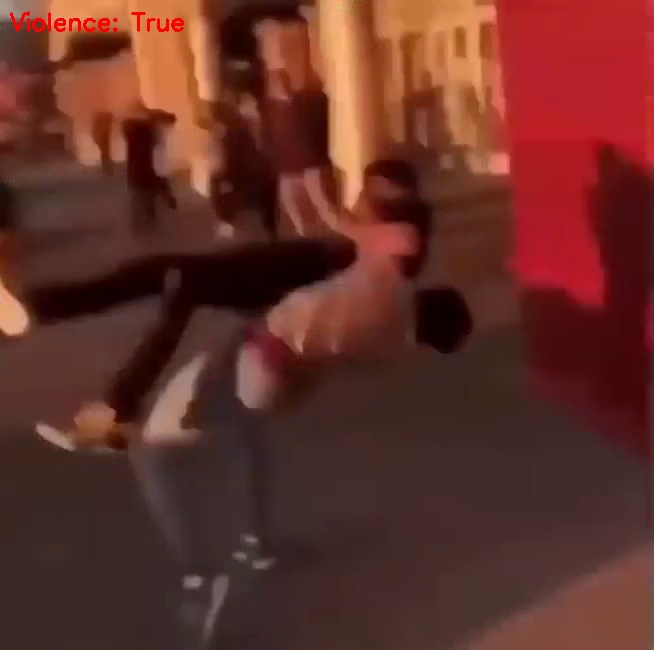

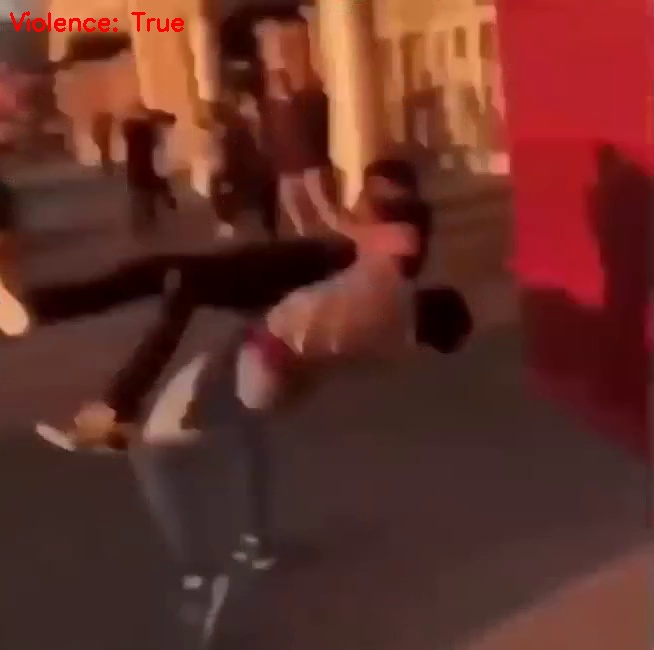

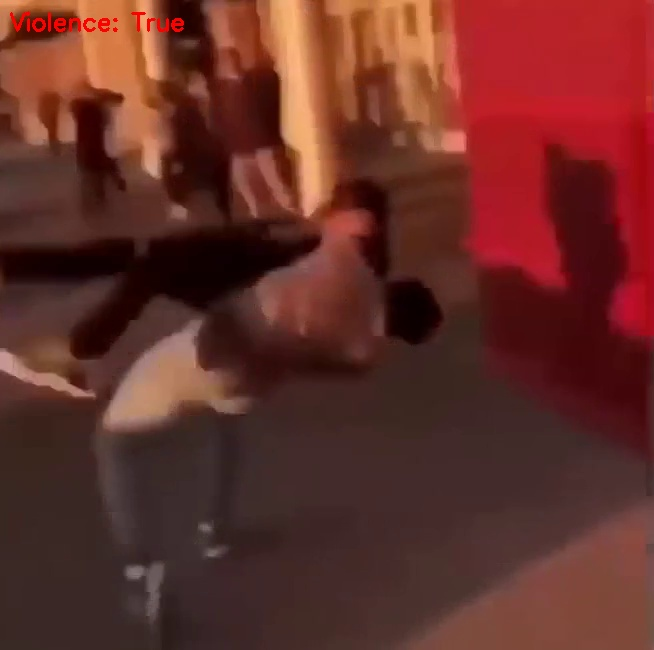

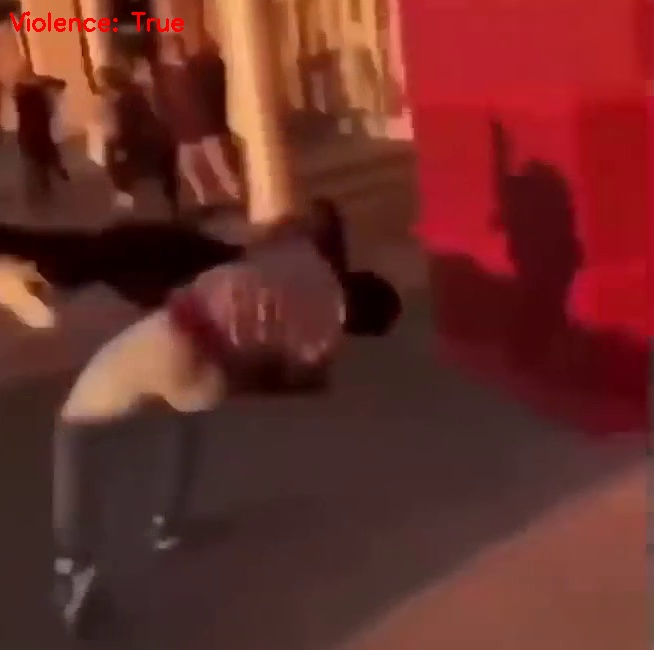

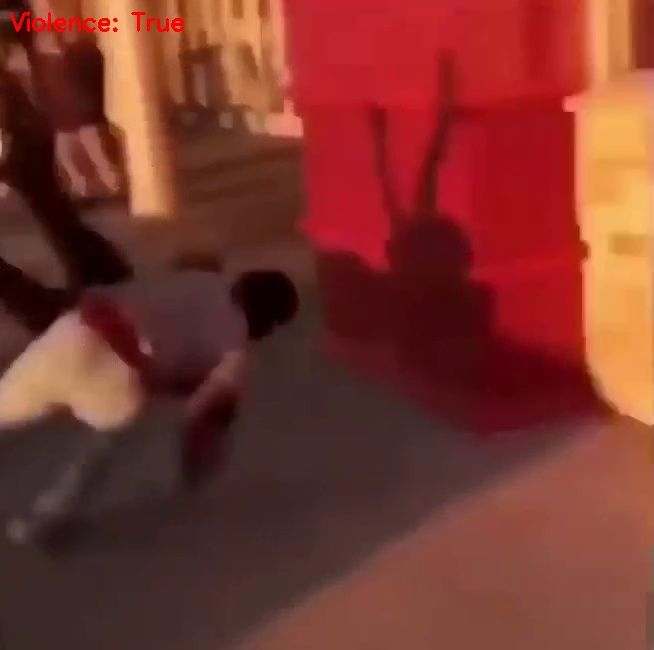

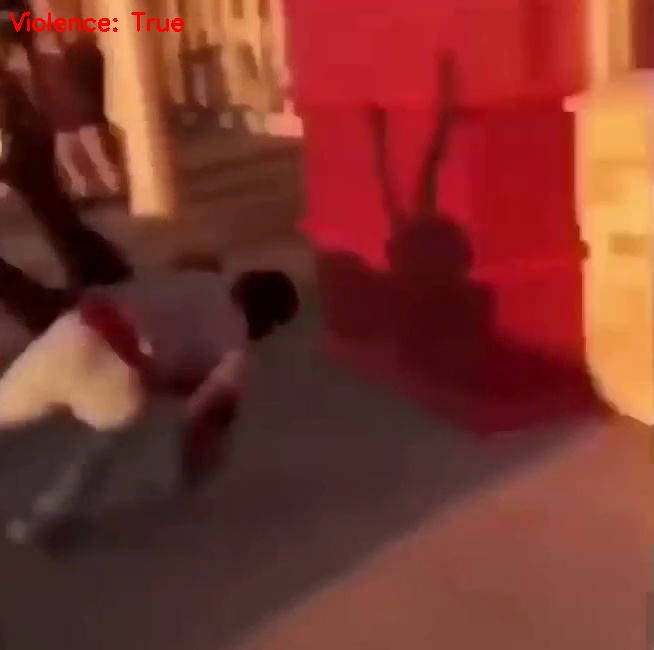

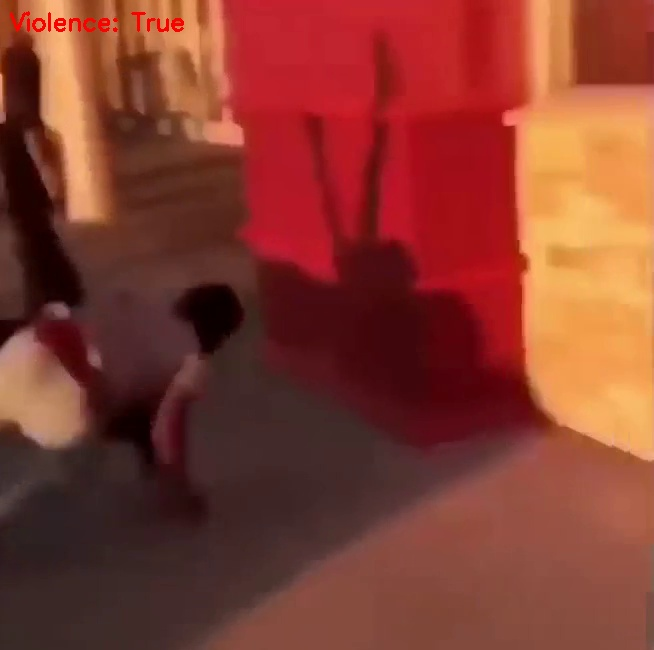

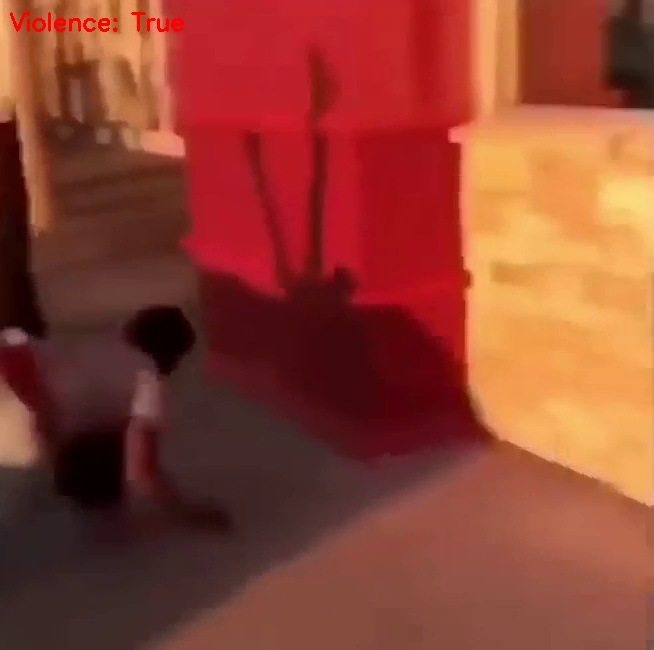

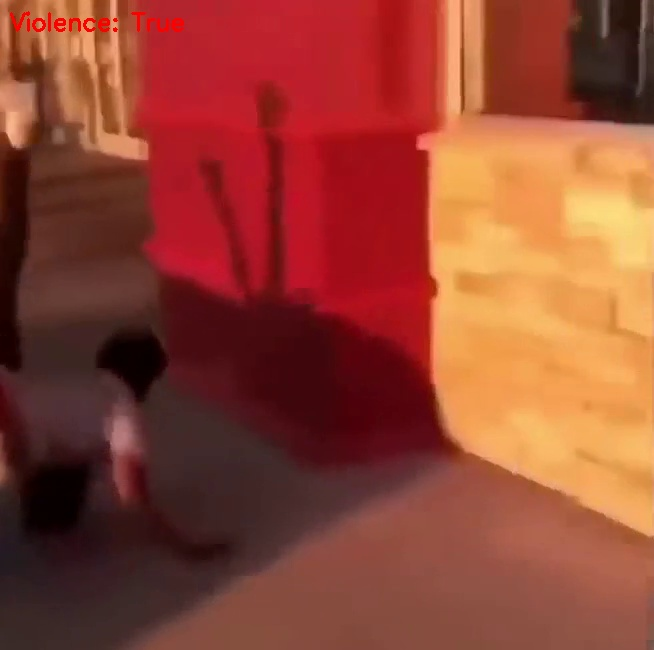

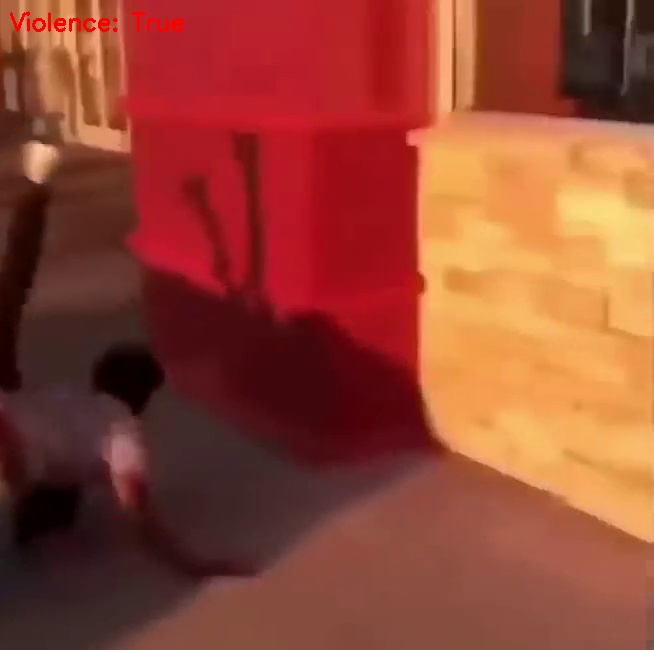

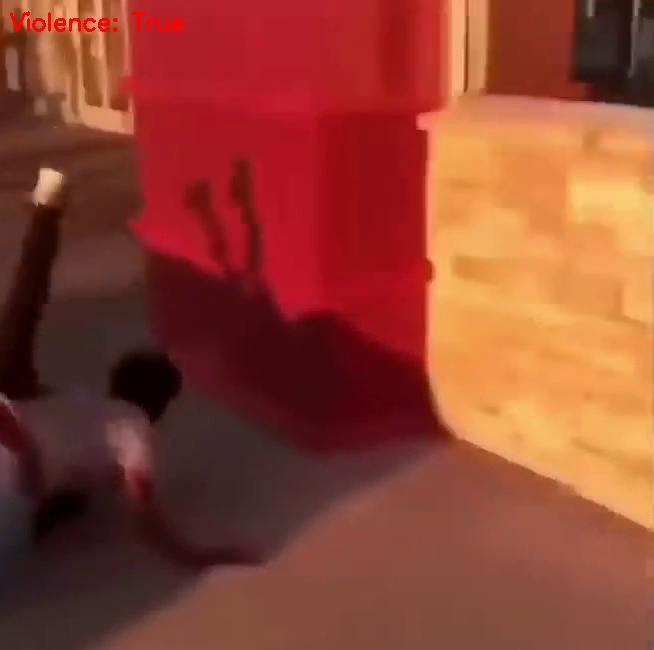

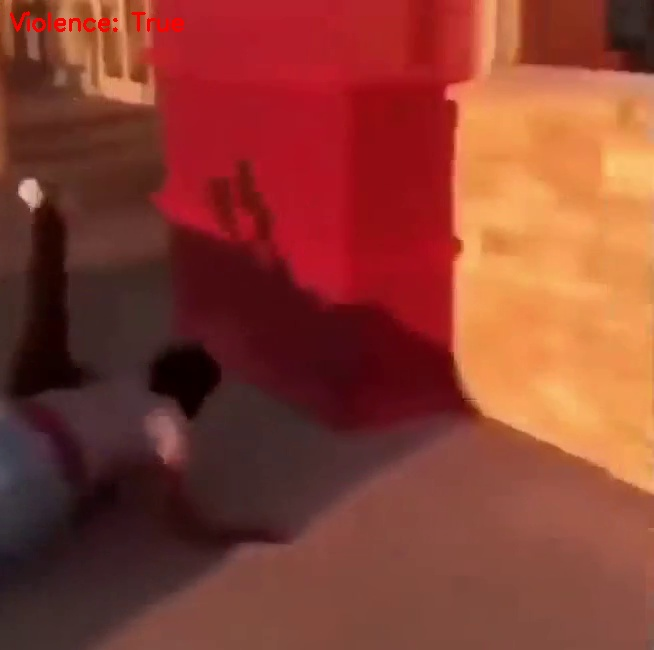

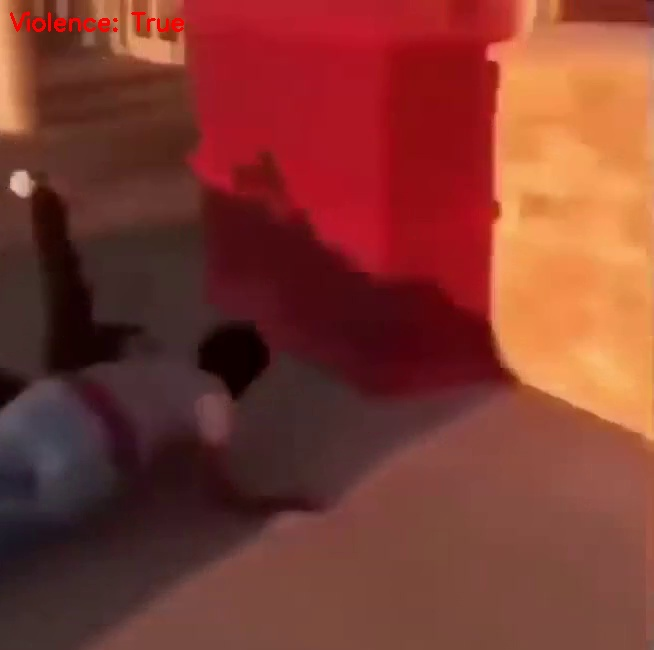

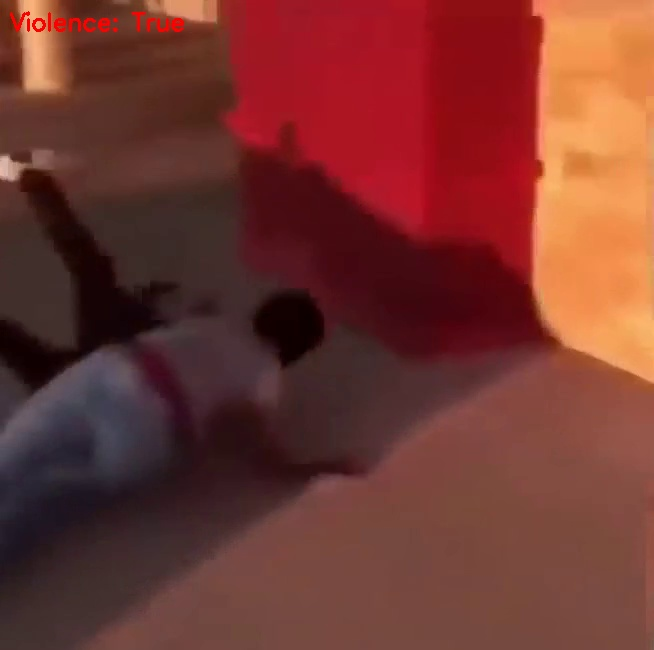

[INFO] Total Frames: 105
[INFO] Violence Detected in 105 frames (100.00%)
[INFO] Processing complete.


In [25]:
import numpy as np
import cv2
import os
from keras.models import load_model
from collections import deque

def print_results(video_path):
    if not os.path.exists(video_path):
        print(f"[ERROR] Video file not found: {video_path}")
        return

    # Output folders
    output_dir = "output"
    violence_dir = os.path.join(output_dir, "violence_frames")
    os.makedirs(violence_dir, exist_ok=True)

    print("[INFO] Loading model...")
    model_path = r"C:\Users\Vyshnavi Malle\Desktop\final_project\modelnew.h5"
    model = load_model(model_path)

    Q = deque(maxlen=128)
    print(f"[INFO] Reading video: {video_path}")
    vs = cv2.VideoCapture(video_path)

    if not vs.isOpened():
        print(f"[ERROR] Could not open video: {video_path}")
        return

    writer = None
    (W, H) = (None, None)
    total_frames = 0
    violence_frames = 0

    while True:
        grabbed, frame = vs.read()
        if not grabbed:
            break

        if W is None or H is None:
            (H, W) = frame.shape[:2]

        output = frame.copy()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (128, 128)).astype("float32") / 255.0
        frame = frame.reshape((1, 128, 128, 3))

        preds = model.predict(frame, verbose=0)[0]
        Q.append(preds)
        results = np.array(Q).mean(axis=0)
        label = (results > 0.5)[0]

        color = (0, 255, 0)
        if label:
            color = (0, 0, 255)
            violence_frames += 1
            cv2.imwrite(os.path.join(violence_dir, f"frame_{total_frames}.jpg"), output)

        text = f"Violence: {label}"
        cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        if writer is None:
            fourcc = cv2.VideoWriter_fourcc(*"MJPG")
            writer = cv2.VideoWriter("output/v_output.avi", fourcc, 30, (W, H), True)

        writer.write(output)
        # Show frame inside Jupyter Notebook
        from IPython.display import display, Image
        _, buffer = cv2.imencode(".jpg", output)
        display(Image(data=buffer.tobytes()))

        total_frames += 1

    violence_percent = (violence_frames / total_frames) * 100 if total_frames > 0 else 0
    print(f"[INFO] Total Frames: {total_frames}")
    print(f"[INFO] Violence Detected in {violence_frames} frames ({violence_percent:.2f}%)")

    writer.release()
    vs.release()
    cv2.destroyAllWindows()
    print("[INFO] Processing complete.")

# Use correct path for video
video_path = r"C:\Users\Vyshnavi Malle\Desktop\final_project\archive\Dataset\Violence\V_30.mp4"
print_results(video_path)
